Préambule python :

In [2]:
import matplotlib.pyplot as plt
from math import sqrt, cos, sin, exp, pi
import numpy as np
from random import randint
%matplotlib inline

# <font color='blue'> TD Modélisation 2 :  Phénomènes de diffusion
##  <font color='red'> Première partie : Transfert thermique dans un mur
D'après l'épreuve "*Modélisation de systèmes physiques ou chimiques*" CCP 2015.
###  <font color='green'> 1.1 Théorie <font color='black'>
On étudie les transferts thermiques dans le mur d’une maison (voir figure ci-dessous). La température à l’intérieur de la maison est constante dans le temps et égale à $T_{int} = 20 °C$. Aux temps négatifs ($t < 0$, la température extérieure est égale à $T_{ext}^1 = 10 °C$. A $t = 0$, elle chute brusquement à $T_{ext}^2 = -10 °C$ et elle reste égale à cette valeur aux temps positifs ($t > 0$). On souhaite étudier l’évolution du profil de température dans le mur au cours du temps.
    
<img src="im/fig1.svg">  

Le mur a une épaisseur $e = 40 cm$. Les propriétés physiques du mur sont constantes : conductivité thermique $\lambda = 1,65 W.m^{-1}.K^{-1}$, capacité thermique massique $c_p = 1000 J.kg^{-1}.K^{-1}$, masse volumique $\rho = 2150 kg.m^{-3}$.

Dans cette partie, on établit l’équation gouvernant les variations de la température et on la résout en régime permanent. On suppose que la température dans le mur T ne dépend que du temps t et de la coordonnée x.

**Question 1 :** A quelle condition peut-on supposer que la température ne dépend pas des coordonnées y et z ?

**Correction 1 :** Lorsque les dimensions transversales (selon y et z) du mur sont grandes devant l’épaisseur e du mur, on peut négliger les effets de bords.

**Question 2 :** Donner l’équation générale qui décrit le transport de chaleur dans un solide en l’absence de source d’énergie. Comment cette équation se simplifie-t-elle sous les hypothèses de la question 1 ?

**Correction 2 :** Equation de la chaleur en l’absence de sources d’énergie (et $\lambda$ supposée constante) : $\rho c_p \frac{\partial T}{\partial t} = \lambda \Delta T$

Si $T$ est indépendante de y et z alors : $\rho c_p \frac{\partial T}{\partial t} = \lambda \frac{\partial^2 T}{\partial x^2} $

On envisage plusieurs types de conditions aux limites.

- La température est imposée aux limites du système.

- La paroi extérieure est isolée par un matériau de très faible conductivité.

**Question 3 :** Traduire chacune de ces conditions aux limites sur la fonction $T(x,t)$ et/ou sa dérivée.

**Correction 3 :** 

- Température imposée aux limites du système : $T(0,t) = T_{int} \forall t$ et $T(e,t)=T_{ext} \forall t$.

- Température imposée à l’intérieur et paroi extérieure isolée par un matériau de faible conductivité :  $T(0,t) = T_{int} \forall t$ et $j_{th} (e,t)=- \lambda_{isolant} \frac{\partial T}{\partial x}(e,t)$. Si $\lambda$ est très faible, cela oblige la dérivée de T à prendre de très grandes valeurs. On peut donc supposer que $\frac{\partial T}{\partial x}(e,t) \rightarrow - \infty$


Dans toute la suite, on adoptera des conditions aux limites de type température imposée aux deux extrémités.

**Question 4 :** Résoudre l’équation obtenue à la question 2 en régime permanent, avec les conditions aux limites de type températures imposées :

- pour un instant particulier négatif $t_1 < 0$,

- pour un instant particulier positif $t_2 > 0$, très longtemps après la variation de température extérieure, quand le régime permanent est de nouveau établi dans le mur.

**Correction 4 :** En régime permanent $\frac{\partial T}{\partial t} = 0 \rightarrow \frac{\partial^2 T}{\partial x^2} = 0$ et donc $T(x) = a.x + b$.

Pour $t < 0$ : $T(x)=\left( T_{ext}^1 - T_{int} \right) \frac{x}{e} + T_{int}$.

Pour $t \to +\infty$ : $T(x)=\left( T_{ext}^2 - T_{int} \right) \frac{x}{e} + T_{int}$.

**Question 5 :** Quelle est la nature des profils $T(x)$ obtenus (en régime permanent) à ces deux instants ? Tracer à la main les deux profils sur un même graphique sur la copie.

**Correction 5 :** En régime stationnaire, le profil suit celui d'une fonction affine. En rouge pour $t<0$, et en bleu ciel pour $t \to +\infty$  et dans d'autres couleurs pour les cas intérmédiaires.
<img src="im/fig2.svg">  


**Question 6 :** Sur le même graphique, tracer à la main qualitativement les profils intermédiaires à différents instants entre la variation brutale de la température extérieure ($t = 0$) et l’instant $t_2$ où le régime est de nouveau permanent.

**Correction 6 :** Juste après le changement brutal, la température n’a significativement varié qu’au voisinage de e (tracé en bleu foncé).
Après un temps suffisamment long le changement de température se fait ressentir dans toute l’épaisseur du mur (tracé vert).
On peut utiliser le temps caractéristique d’évolution $L \simeq \sqrt{D \tau}$ de la température sur une longueur $L$, avec $D= \frac{\lambda}{\rho c_p}$ coefficient de diffusion thermique :
- $\tau = 10s$ donne $L \simeq 3 mm$
- $\tau = 500s$ donne $L \simeq 2 cm$

###  <font color='green'> 1.2 Discrétisation de l'équation différentielle <font color='black'>

On cherche à résoudre numériquement l’équation aux dérivées partielles :  $$\alpha \frac{\partial T}{\partial t} = \frac{\partial ^2 T }{\partial x^2}$$
où $\alpha$ est une constante. A cette équation sont associées les conditions :
$$ \begin{cases}
&T(0,t) = T_{int} & \forall	t > 0\\
&T(e,t) = T_{ext}^2 & \forall	t > 0\\
&T(x,0) = a.x + b 	& \forall	x \in [0,e]
\end{cases}$$

**Question 1 :**  Quelle est l’expression de $\alpha$ en fonction des paramètres physiques du mur ? Comment peut-on le relier au coefficient de diffusion ?

**Correction 1 :** $\alpha = \frac{1}{D} = \frac{\rho c_p}{\lambda}$

**Question 2:** Exprimer $a$ et $b$ en fonction de $T_{int}$, $T_{ext}^1$ et $e$.

**Correction 2 :** Voir partie 1 : $a = \frac{T_{ext}^1 - T_{int}}{e}$ et $b = T_{int}$.

Pour effectuer la résolution de l’équation, nous allons utiliser la méthode des différences finies, qui repose sur une discrétisation de l'espace et du temps.

On divise l’intervalle $[0,e]$, représentant l’épaisseur du mur, en $N + 2$ points, numérotés de $0$ à $N + 1$, régulièrement espacés de $\Delta x$ (voir figure ci-dessous). Cette division est appelée « discrétisation ». La distance $\Delta x$ est appelée le « pas d’espace ». A l’intérieur du mur (frontières intérieure et extérieure exclues) se trouvent donc $N$ points. On cherche à obtenir la température en ces points particuliers à chaque instant.

<img src="im/fig3.svg"> 

**Question 3 :** Donner l’expression de $\Delta x$ en fonction de $N$ et de l’épaisseur du mur $e$. Donner l’abscisse $x_i$ du i<sup>ème</sup> point en fonction de $i$ et $\Delta x$, sachant que $x_0 = 0$ et $x_{N+1} = e$.

**Correction 3 :** $\Delta x = \frac{e}{N+1}$ et $x_i = i \Delta x$.

Le temps est discrétisé en *ItMax* intervalles de durée $\Delta t$ et on ne s’intéresse au profil de température qu’aux instants particuliers $t_k = k\Delta t$. L’intervalle élémentaire de temps $\Delta t$ est appelé le « pas de temps ».
Pour résoudre l’équation de diffusion, deux méthodes sont proposées :

- méthode utilisant un schéma explicite,

- méthode utilisant un schéma implicite.

Dans la suite, on cherche à résoudre cette équation avec un schéma explicite.

**Question 4 :** A l’aide d’un développement limité de la fonction $x \rightarrow T(x,t)$, donner une expression de $T(x + \Delta x,t)$ à l’ordre  3 $ ( \mathcal{o}(\Delta x^3) )$ en fonction de T et de ses dérivées partielles par rapport à $x$ évaluées en $(x,t)$. De même, donner une expression de $T(x - \Delta x,t)$ à l’ordre $3$.

**Correction 4 :** $T(x+\Delta x, t) = T(x,t) + \Delta x \frac{\partial T}{\partial x} (x,t) + \frac{(\Delta x)^2}{2}\frac{\partial^2 T}{\partial x^2} (x,t) + \frac{(\Delta x)^3}{6}\frac{\partial^3 T}{\partial x^3} (x,t) + \mathcal{o}(\Delta x^3) $
$T(x-\Delta x, t) = T(x,t) - \Delta x \frac{\partial T}{\partial x} (x,t) + \frac{(\Delta x)^2}{2}\frac{\partial^2 T}{\partial x^2} (x,t) - \frac{(\Delta x)^3}{6}\frac{\partial^3 T}{\partial x^3} (x,t) + \mathcal{o}(\Delta x^3) $

**Question 5 :** En déduire une expression approchée à l’ordre 1 $ ( \mathcal{o}(\Delta x) )$ de $\frac{\partial^2 T }{\partial x^2}(x,t)$  (dérivée partielle spatiale seconde de $T$ évaluée au point $x$ à l’instant $t$) en fonction de $T(x + \Delta x,t)$,$ T(x - \Delta x,t)$, $T(x,t)$ et $\Delta x$.

**Correction 5 :** Grâce aux deux expressions précédentes, on obtient : $\frac{\partial^2 T }{\partial x^2}(x,t) = \frac{T(x + \Delta x,t)+T(x - \Delta x,t)-2T(x ,t)}{(\Delta x)^2} + \mathcal{o}(\Delta x)$

On note $T_i^k$ la température $T(x_i,t_k)$, évaluée au point d’abscisse $x_i$ à l’instant $t_k$. De même, on note $T_{i+1}^k = T(x_i + \Delta x,t_k)$ et $T_{i-1}^k = T(x_i - \Delta x,t_k)$.


**Question 6 :** Déduire de la question précédente une expression approchée de $\left. \frac{\partial ^2 T}{\partial x^2}\right|_{x_i,t_k}$ (dérivée partielle spatiale seconde de $T$ évaluée en $x_i$ à l’instant $t_k$) en fonction de $T_i^k$, $T_{i+1}^k$, $T_{i-1}^k$ et $\Delta x$.

**Correction 6 :**  On remplace dans l'expression précédente $T(x_i ,t_k)$ par $T_i^k$, et on obtient : $\left. \frac{\partial ^2 T}{\partial x^2}\right|_{x_i,t_k}\simeq  \frac{T_{i+1}^k+T_{i-1}^k-2T_i^k}{(\Delta x)^2}$

La dérivée partielle temporelle de l’équation de diffusion est maintenant approchée grâce à un développement limité.

**Question 7 :** A l’aide d’un développement limité de la fonction $t \rightarrow T(x,t)$, donner une expression de $T(x,t + \Delta t)$ à l’ordre 1 ($\mathcal{o}(\Delta t)$) en fonction de $T$ et de sa dérivée partielle par rapport à $t$ évaluées en $(x,t)$.

**Correction 7 :** $T(x,t + \Delta t)=T(x,t) + \Delta t \frac{\partial T}{\partial t} (x,t) + \mathcal{o}(\Delta t)$

**Question 8 :** En déduire une valeur approchée de $\frac{\partial T}{\partial t} (x,t)$ (dérivée partielle par rapport au temps de T évaluée au point $x$ à l’instant $t$) à l’ordre $0$ $(\mathcal{o}(1))$ en fonction de $T(x,t + \Delta t)$, $T(x,t)$ et $\Delta t$.

**Correction 8 :** $\frac{\partial T}{\partial t} (x,t) = \frac{T(x,t+\Delta t) - T(x,t)}{\Delta t} + \mathcal{o}(1)$

**Question 9 :** Donner une expression de $\left. \frac{\partial T}{\partial t}\right|_{x_i,t_k}$ (dérivée partielle par rapport au temps de $T$ évaluée en $x_i$ à l’instant $t_k$) en fonction de $T_i^k$, $T_i^{k+1}$ et $\Delta t$, avec $T_i^{k+1} = T(x_i,t_{k} + \Delta t)$.

**Correction 9 :** $\left. \frac{\partial T}{\partial t}\right|_{x_i,t_k}\simeq  \frac{T_{i}^{k+1}-T_{i}^{k}}{\Delta t}$

L’équation de diffusion est valable en chaque point d’abscisse $x_i$ et à chaque instant $t_k$.

**Question 10 :** Ecrire la forme approchée de cette équation au point $i$ et à l’instant $k$ en approchant  $\left. \frac{\partial ^2 T}{\partial x^2}\right|_{x_i,t_k}$ avec la formule obtenue à la question 6, et en approchant $\left. \frac{\partial T}{\partial t}\right|_{x_i,t_k}$ avec la formule obtenue à la question 9.

**Correction 10 :** $\alpha  \frac{T_{i}^{k+1}-T_{i}^{k}}{\Delta t} \simeq  \frac{T_{i+1}^k+T_{i-1}^k-2T_i^k}{(\Delta x)^2}$

**Question 11** : Montrer que l’équation obtenue à la question précédente peut s’écrire sous la forme : $$T_i^{k+1} = r T_{i-1}^{k} + (1-2r)T_i^k + r T_{i+1}^{k}$$
en précisant l'expression du paramètre $r$ en fonction de $\Delta x$, $\Delta t$ et $\alpha$.

**Correction 11** : $r=\frac{\Delta t}{\alpha (\Delta x)^2}$

Cette dernière équation est appelée schéma numérique explicite. Si on connaît la température en tous les points $x_1$, $x_2$, …, $x_{N+1}$, $x_N$ à l’instant $t_k$, on peut calculer grâce à elle la température en tous les points à l’instant ultérieur $t_{k+1}$.

###  <font color='green'> 1.3 Résolution numérique <font color='black'>
    
**Question 1 :** L’équation établie en fin de partie précédente est-elle valable dans tout le domaine, c’est-à-dire pour toute valeur de
$i, 0 ≤ i ≤ N + 1$ ? Que valent $T_0^k$ et $T_{N+1}^k$ ?

**Correction 1 :** Cette équation n'est valable pour $T_i^k$ que si $T_{i-1}^{k}$ et $T_{i+1}^{k}$ existent ! Il faut donc que $i\in [1,N]$, et alors $T_0^k = T_{int}$ et $T_{N+1}^k = T_{ext}^2$.

Dans la suite, on va élaborer une fonction `schema_explicite` permettant de calculer la température en chaque point au cours du temps selon le schéma explicite. Parmi les variables d’entrée se trouvera un vecteur `T0` de dimension `N`, défini en dehors de la fonction, contenant les valeurs de la température aux points de discrétisation à l’instant initial. Au sein de la fonction, un algorithme calculera itérativement la température avec un nombre maximal d’itérations `ItMax`. En sortie de la fonction, on récupérera le nombre d’itérations réellement effectuées, `nbIter` et une matrice `T_tous_k`, de dimensions $N * nbIter$. Chaque colonne de cette matrice contient le vecteur `Tk` dont les éléments sont les valeurs de la température aux $N+2$ points $x_0$, $x_1$, …, $x_{N}$, $x_{N+1}$ (points du mur) à l’instant `k` ($k \in [0,nbIter]$):
$$Tk = \begin{pmatrix}  T_0^k \\ T_1^k \\ \vdots\\  T_N^k  \\ T_{N+1}^k \end{pmatrix}$$
Et, avec $K=nbIter$ :
$$ \mbox{T_tous_k} = \begin{pmatrix} 
T_0^0&  T_0^1  & \dots & T_0^{K-1} & T_0^K \\
T_1^0&  T_1^1  & \dots & T_1^{K-1} & T_1^K \\
\vdots & \vdots & \ddots & \vdots & \vdots \\
T_{N}^0 &T_{N}^1  & \dots & T_{N}^{K-1} & T_{N}^K\\
T_{N+1}^0 &T_{N+1}^1  & \dots & T_{N+1}^{K-1} & T_{N+1}^K 
\end{pmatrix} $$

*Remarque : L'énoncé original est ici modifié (on a jouté une première colone, qui est le vecteur T0, et deux lignes, celles des températures à la frontière avec l'intérieur et avec l'extérieur), pour tenir compte d'une incohérence avec la suite...*

On souhaite arrêter le calcul lorsque la température ne varie presque plus dans le temps. Dans ce but, on évaluera la norme 2 de $T^k - T^{k-1}$ à chaque itération. La définition de la norme 2 est rappelée à la question 7.

**Question 2 :** Ecrire l’en-tête de la fonction, ainsi que la fin qui retourne tous les arguments de sortie.

**Correction 2 :** On utilise des tableaux numpy (`nd.array`) comme le suggère l’annexe, la programmation pourrait être faite avec des listes Python.

Il faut introduire comme argument `T0`, ce qui permettra d'en déduire `N`. Il sera aussi nécessaire d'introduire `Tint`, `Text2` et `r` :

In [ ]:
def schema_explicite(T0,Tint,Text2,r):
    ...
    return nbIter, T_tous_k

Le schéma numérique explicite permet d’approcher avec succès la solution à la condition $r <\frac{1}{2}$.

**Question 3 :** Programmer un test qui avertit l’utilisateur si cette condition n’est pas respectée.

**Correction 3 :**

In [ ]:
def schema_explicite(T0,Tint,Text2,r):
    N = len(T0)
    if r > 0.5 :
        return "Prière de diminuer la valeur de r"
    ...
    return nbIter, T_tous_k

**Question 4 :** Affecter la valeur 2 000 à `ItMax`. Créer la matrice `T_tous_k` de dimensions N * ItMax en la remplissant de zéros.

**Correction 4 :**

In [ ]:
def schema_explicite(T0,Tint,Text2,r):
    N = len(T0)
    if r > 0.5 :
        return "Prière de diminuer la valeur de r"
    ItMax = 2000
    
    T_tous_k = np.zeros((N,ItMax))
    ...
    return nbIter, T_tous_k

**Question 5:** Remplacer la première colonne de `T_tous_k` par le vecteur des valeurs initiales `T0`.

**Correction 5:**

In [ ]:
def schema_explicite(T0,Tint,Text2,r):
    N = len(T0)
    if r > 0.5 :
        return "Prière de diminuer la valeur de r"
    ItMax = 2000
    
    T_tous_k = np.zeros((N+2,ItMax))
    T_tous_k[:,0]=T0[:]
    ...
    return nbIter, T_tous_k

**Question 6:** Calculer le profil de température à l’instant $k = 1$ ($t = \Delta t$), en distinguant le cas $i = 0$, le cas $1 ≤ i ≤ N$ et le cas $i = N+1$. Affecter ces valeurs à la deuxième colonne de `T_tous_k`.

**Correction 6:**

In [9]:
def schema_explicite(T0,Tint,Text2,r):
    N = len(T0)
    if r > 0.5 :
        return "Prière de diminuer la valeur de r"
    ItMax = 2000
    
    T_tous_k = np.zeros((N+2,ItMax))
    T_tous_k[:,0]=T0[:]
    
    # k = 1
    # i = 0 (point frontière avec l'intérieur)
    T_tous_k[0,1] = T_int
    # i de 1 à N inclus :
    for i in range(1,N+1):
        T_tous_k[i,1] = r*T_tous_k[i-1,0] + (1-2*r)*T_tous_k[i,0]+r*T_tous_k[i+1,0]
    # i = N+1 (point frontière avec l'extérieur)
    T_tous_k[N+1,1] = Text2
    ...
    return nbIter, T_tous_k

**Question 7:** Ecrire une fonction `calc_norme` qui calcule la norme 2 d’un vecteur. On rappelle que la norme 2 d’un vecteur $V = \begin{pmatrix} V_1 \\ V_2 \\ \vdots\\ V_{n-1} \\ V_n \end{pmatrix} $ s’écrit : 
$$ \left|| V \right|| _2 = \sqrt{\sum_{i=1}^n V_i^2}$$

**Correction 7:**

In [3]:
def calc_norme(V):
    return sqrt(sum([vi**2 for vi in V]))

# Ou, sans tricher :
def calc_norme(V):
    s = 0
    for elem in V:
        s += elem**2
    return sqrt(s)

Test :

In [4]:
B=[1,2,3]
print(calc_norme(B)**2)


14.0


**Question 8:** Elaborer une boucle permettant de calculer itérativement le profil de température aux instants $tk = k.\Delta t$ avec $k ≥ 2$. Cette boucle sera interrompue lorsque la norme 2 du vecteur $T_k - T_{k-1}$ deviendra inférieure à $10^{-2}$ ou lorsque le nombre d’itérations atteindra la valeur ItMax (prévoir les deux cas). Utiliser, pour cela, la fonction `calc_norme` définie à la question précédente.

**Correction 8:**

In [4]:
def schema_explicite(T0,Tint,Text2,r):
    N = len(T0)
    if r > 0.5 :
        return "Prière de diminuer la valeur de r"
    ItMax = 10000 # On va plus loin que l'énoncé, on est en 2021 maintenant !
    
    T_tous_k = np.zeros((N+2,ItMax))
    T_tous_k[:,0]=T0[:]
    
    k = 1 # Premier pas de temps après condition initiale
    # i = 0 (point frontière avec l'intérieur)
    T_tous_k[0,1] = T_int
    # i de 1 à N inclus :
    for i in range(1,N+1):
        T_tous_k[i,1] = r*T_tous_k[i-1,0] + (1-2*r)*T_tous_k[i,0]+r*T_tous_k[i+1,0]
    # i = N+1 (point frontière avec l'extérieur)
    T_tous_k[N+1,1] = Text2
     
    # Autres pas de temps
    while k<ItMax and calc_norme(T_tous_k[:,k]-T_tous_k[:,k-1])>0.01 :
        T_tous_k[0,k+1] = Tint
        for i in range(1,N+1):
            T_tous_k[i,k+1] = r*T_tous_k[i-1,k] + (1-2*r)*T_tous_k[i,k]+r*T_tous_k[i+1,k]
        T_tous_k[N+1,k+1] = Text2
        k += 1
    nbIter=k

    return nbIter, T_tous_k

**Question 9:** Définir les variables `epais` (épaisseur du mur), `conduc` (conductivité thermique), `rho` (masse volumique), `Cp` (capacité thermique massique), `Tint` (température intérieure), `Text1` (température extérieure pour les instants $t < 0$), `Text2` (température extérieure pour les instants $t ≥ 0$), `N` (nombre de points de calcul à l’intérieur du mur) et `Dt` (intervalle de temps élémentaire) et leur affecter les valeurs correspondant au problème physique défini au début de l’énoncé. On prendra un nombre de points de discrétisation $N = 60$ et un pas de temps $\Delta t$ de 25 secondes.
Calculer alors les coefficients a et b, et créer alors un vecteur `x` composé des éléments $x_1$, $x_2$, …, $x_N$. En déduire le vecteur des températures initiales `T0`, les paramètres `alpha` et `r`.


**Correction 9:**

In [5]:
# Paramètres 
epais=0.4
Tint,Text1,Text2=20,10,-10
conduc,rho,c=1.65,2150,1000
N,dt=60,25

# Température initiale
a=(Text1-Tint)/epais
b=Tint
dx=epais/(N+1)
x=np.linspace(0,epais,N+2) 
T0=a*x+b

# Paramètres de modélisation
alpha=rho*c/conduc
r=dt/(dx**2*alpha)

**Question 10 :** Ecrire un script permettant de tracer sur un même graphique le profil de température en fonction de $x$ tous les 100 pas de temps. Faire afficher le temps en heures au bout duquel le régime permanent est établi.

**Correction 10:**

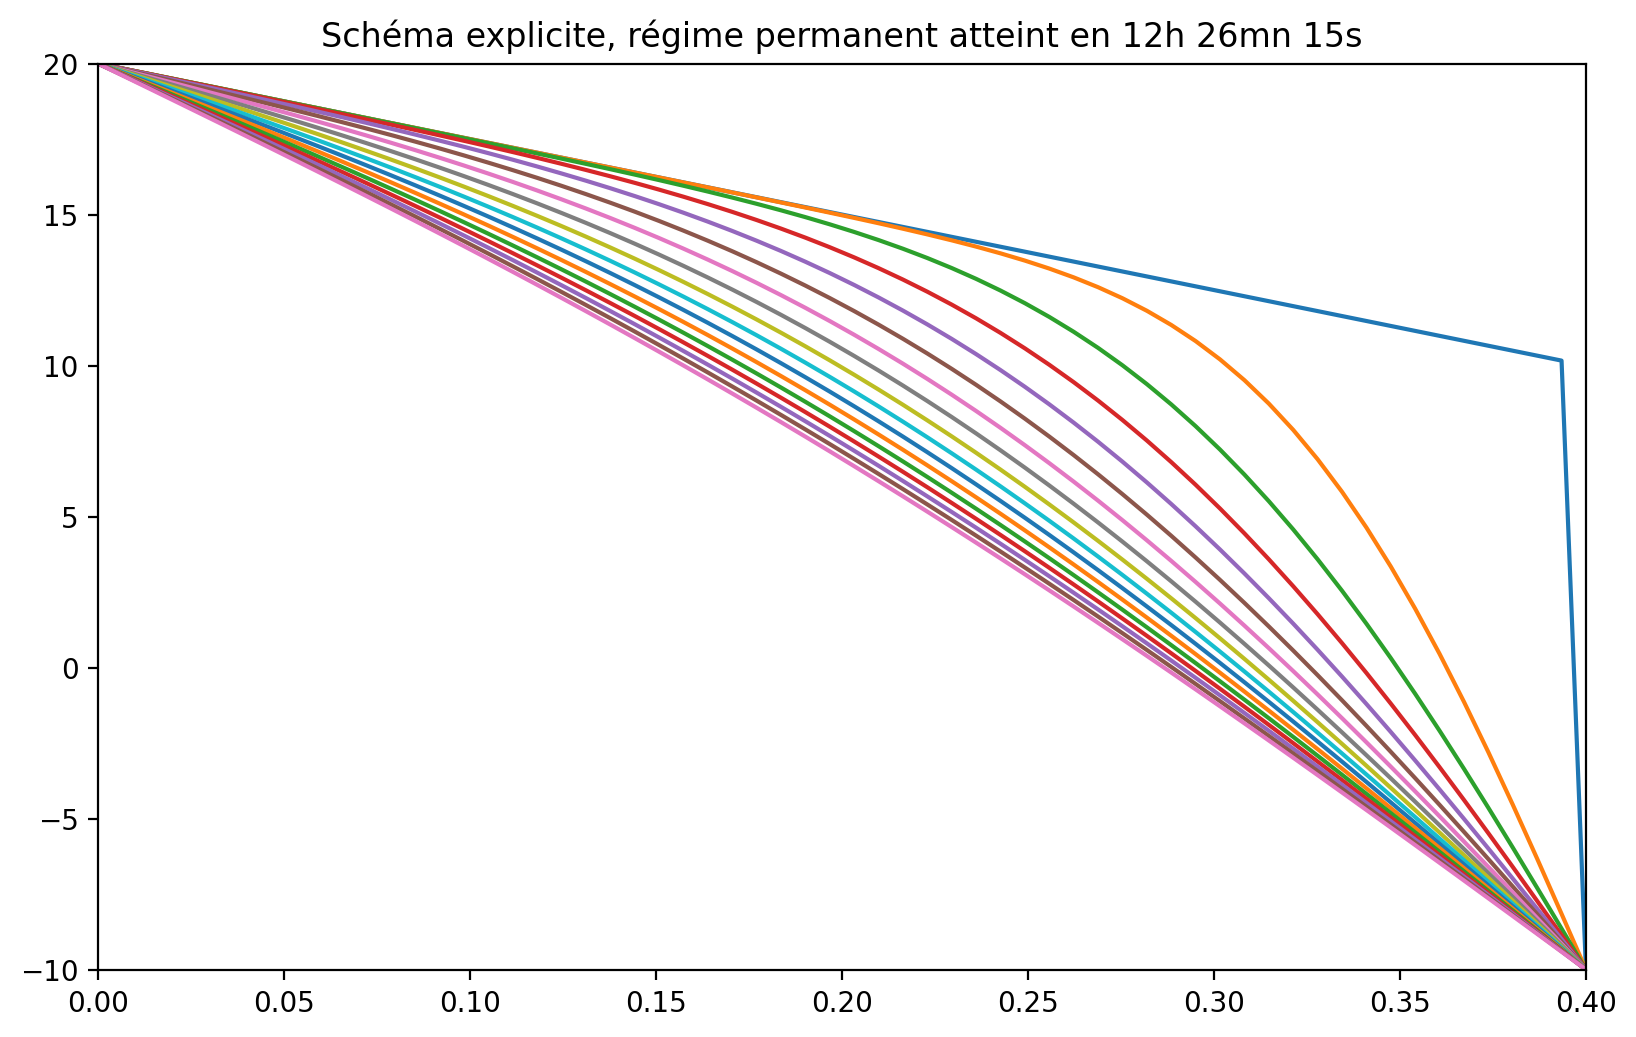

In [7]:
abscisses=[0]+list(x)+[epais]

ratio = 1.2 # ratio de taille entre fig et texte (légende et axes), par défaut 1
plt.figure(figsize=(8*ratio,5*ratio),dpi = 200)
plt.xlim(0,epais) # taille de l’axe des abscisses
plt.ylim(-10,20) # taille de l’axe des ordonnées

if r>=0.5 : print("Simulation explicite risquée : dt trop grand ou dx trop petit")
it,tab_T=schema_explicite(T0,Tint,Text2,r) 
temps=it*dt
h=temps//3600
m,s=(temps%3600)//60,(temps%3600)%60
plt.title("Schéma explicite, régime permanent atteint en {0}h {1}mn {2}s".format(h,m,s))
for i in range(it//100):
    plt.plot(abscisses,[Tint]+list(tab_T[:,100*i])+[Text2])
plt.show()

###  <font color='green'> Pour aller plus loin : le schéma implicite <font color='black'>

Le schéma explicite précédent ne converge que si le pas de temps $\Delta t$‬ est suffisamment faible par rapport
au pas d’espace $\Delta x$ (plus précisément $ r > \frac{1}{2} $). Si l’on souhaite effectuer un calcul pour un temps physique long, beaucoup d’itérations seront nécessaires et le temps de calcul sera très long. C’est pourquoi on préfère d’autres types de schémas appelés schémas implicites.

Dans cette partie, la dérivée partielle seconde par rapport à $x$ de la température apparaissant dans l’équation de diffusion est évaluée au point d’abscisse $x_i$ et à l’instant $k + 1$ : $$ \left.\frac{\partial^2 T}{\partial x^2}\right|_{x,t} \simeq \left.\frac{\partial^2 T}{\partial x^2}\right|_{x_i,t_{k+1}} $$
et la dérivée partielle par rapport à t est évaluée au point d’abscisse xi et à l’instant k :$$  \left.\frac{\partial T}{\partial t}\right|_{x,t} \simeq \left.\frac{\partial T}{\partial t}\right|_{x_i,t_{k}}  $$

**Question 1 :** Montrer que la nouvelle expression approchée de l’équation de diffusion, sur le modèle de la question 11 de la deuxième partie, peut s'écrire : $ T_i^k = -r T_{i-1}^{k+1} +(1+2r)T_i^{k+1}-r T_{i+1}^{k+1} $

L’équation obtenue est appelée schéma implicite car la température à l’instant $t_k$ est exprimée en fonction de la température à l’instant ultérieur $t_{k+1}$.

Le système d’équations ainsi obtenu peut être écrit sous la forme :
$$ M.T^{k+1} = T^k +r.v $$	
$M$ est une matrice carrée N*N et $T^k$ et $T^{k+1}$ sont les vecteurs de dimension N définis par :
$$ T^k = \begin{pmatrix} T_1^k \\ T_2^k \\ \vdots\\ T_{N-1}^k \\ T_N^k \end{pmatrix}\ \mathrm{ et }\ T^{k+1} = \begin{pmatrix} T_1^{k+1} \\ T_2^{k+1} \\ \vdots\\ T_{N-1}^{k+1} \\ T_N^{k+1} \end{pmatrix} $$
et v est un vecteur de taille N faisant intervenir les conditions aux limites.

**Question 2 :** Préciser l’expression de la matrice M et l’expression du vecteur v.

**Correction 2 :**  D'après l'équation précédente, on a $M_{i,i}= 1+2r$ et  $ M_{i-1,i}=M_{i+1,i}=-r$, soit :

$$ M = \begin{pmatrix}1+2r & -r &  & & 0 \\ 
-r & \ddots &  &  &  \\
 &  &  &   &  \\
 & -r & 1+2r & -r  &  \\
  &  &  &   &  \\
 &  &  & \ddots &  -r\\
0 & & & -r & 1+2r
\end{pmatrix}$$

On a evidemment quelques problèmes au bords ($i=1$ et $i=N$), qu'il faut traiter à part : on a ainsi $ T_1^K = -r T_{int}+(1+2r)T_1^{k+1}-r T_{2}^{k+1} $ et $T_{N-1}^K = -r T_{N-2}^{k+1} +(1+2r)T_{N-1}^{k+1}-r T_{ext}^2 $.

Ce qui donne : $ v=\begin{pmatrix} T_{int} \\ 0 \\ \vdots\\ 0 \\ T_{ext}^2 \end{pmatrix}$.

L'inconvéniant de ce schéma implicite, c'est qu'il faut inverser ce système pour chaque pas de temps... Pour cela, on pourrait utiliser la méthode du pivot de Gauss, la suite de l'énoncé propose plutôt la "méthode de Thomas", optimisée pour ce genre de matrice "simple".

##  <font color='red'> Deuxième partie : Transfert thermique dans un oeuf
    
*D'après Oral Centrale Physique 2.*

###  <font color='green'> Théorie et solution numérique<font color='black'>



On s’intéresse à la cuisson d’un œuf de poule. Celui-ci est constitué d’une coquille calcaire contenant
principalement deux zones distinctes : l’une périphérique appelée « blanc » (albumen) et l’autre centrale appelée
« jaune » (vitellus). Ces deux zones sont fluides avant cuisson.

<img src="im/oeuf.png"> 

On modélise un œuf par une sphère de rayon R, avec une répartition à symétrie sphérique du blanc et du jaune.

**Question 1 :** Montrer que, compte-tenu de la symétrique sphérique du problème, l’équation de diffusion s’écrit :
$$ \frac{\partial T(r,t)}{\partial t} = D \frac{1}{r^2} \frac{\partial}{\partial r}\left( r^2 \frac{\partial T(r,t)}{\partial r} \right)$$
*Aide : on rapelle que, en sphérique :* $$ \Delta f = \frac{\partial^2 f}{\partial r^2} +  \frac{2}{r} \frac{\partial f}{\partial r} + \frac{1}{r^2}\frac{\partial^2 f}{\partial \theta^2}  + \frac{1}{r^2 \tan\theta}\frac{\partial f}{\partial \theta} + \frac{1}{r^2 \sin^2 \theta}\frac{\partial^2 f}{\partial \varphi^2} $$
    
**Correction 1 :** D'après la symétrie du problème (invariance par rotation selon $\theta$ et $\varphi$), la température $T(r,\theta,\varphi,t)$ ne dépend que de $t$ et $r$ : $T(r,\theta,\varphi,t)=T(r,t)$ . On a donc :
$$  \Delta T(r,t) = \frac{\partial^2 T}{\partial r^2} +  \frac{2}{r} \frac{\partial T}{\partial r}  = \frac{1}{r^2} \frac{\partial}{\partial r}\left( r^2 \frac{\partial T}{\partial r} \right)$$
L'équation de diffusion $ D \Delta T = \frac{\partial T}{\partial t}$ avec $D$ coefficient de diffusion s'écrit ainsi comme demandé.

On souhaite maintenant modéliser numériquement l’évolution au cours du temps du profil de température au
sein de l’œuf. On utilise pour cela la méthode d’Euler pour discrétiser l’équation précédente.

Le principe adopté est le suivant : le profil de température initial T (r, t = 0) au sein de l’œuf est connu. On
pose comme variable intermédiaire : $\Theta (r,t) = \frac{\partial T(r,t)}{\partial r}$.

**Question 2 :** Ecrire le système d'équation différentiel d'ordre 1 faisant intervenir les fonctions $T(r,t)$ et $\Theta (r,t)$.

**Correction 2 :** $$ \begin{cases}
&\Theta (r,t) = \frac{\partial T(r,t)}{\partial r}\\
&\frac{\partial T(r,t)}{\partial t} = D \frac{1}{r^2} \frac{\partial}{\partial r}\left( r^2 \Theta (r,t) \right)
\end{cases}$$

On note $\tau_e$ et $l_e$ les périodes d’échantillonnage (ou « pas ») temporelle et spatiale de la résolution numérique.

**Question 3 :** Montrer, à l'aide d'un D.L. à l'ordre 1 en $l_e$ de $T(r-l_e,t)$, qu'on a $\Theta (r,t) = \frac{T(r,t) - T(r- l_e,t)}{l_e} + \mathcal{o}(1)$

**Correction 3 :** $T(r-l_e,t) = T(r,t) - l_e \frac{\partial T (r,t)}{\partial r} + \mathcal{o}(l_e)$ et ainsi $T(r,t) - T(r-l_e,t) = l_e \frac{\partial T (r,t)}{\partial r} + \mathcal{o}(l_e) = l_e \Theta (r,t)  + \mathcal{o}(l_e)$ et on obtient ainsi le résultat demandé.

**Question 4 :** Montrer, à l'aide d'un D.L. à l'ordre 1 en $l_e$ de $f(r+l_e,t)=(r+l_e)^2\Theta(r+l_e,t)$, que $\frac{\partial r^2\Theta(r,t)}{\partial r} = \frac{(r+l_e)^2\Theta(r+l_e,t) - r^2\Theta(r,t)}{l_e}  +\mathcal{o}(1)$

**Correction 4 :** $f(r+l_e,t)=(r+l_e)^2\Theta(r+l_e,t)=f(r,t) + l_e \frac{\partial f(r,t)}{\partial r} +\mathcal{o}(l_e)=r^2\Theta(r,t) + l_e \frac{\partial r^2\Theta(r,t)}{\partial r} +\mathcal{o}(l_e)$ et donc $(r+l_e)^2\Theta(r+l_e,t) - r^2\Theta(r,t) = l_e \frac{\partial r^2\Theta(r,t)}{\partial r} +\mathcal{o}(l_e)$, et ainsi on trouve le résultat demandé.

On note $T_i^k$ la température $T(r_k,t_i)$, évaluée au point d’abscisse $r_k = k\times l_e$ à l’instant $t_i = i \times \tau_e$, et $\Theta_i^k = \Theta(r_k,t_i)$.

**Question 5 :** En déduire alors, via la méthode d'Euler, le schéma numérique suivant :
$$ \begin{cases}
&\Theta_i^k = \frac{T_i^{k} - T_i^{k-1}}{l_e}\\
&T_{i+1}^k = T_{i}^k + \frac{D\tau_e}{(kl_e)^2}\frac{((k+1)l_e)^2 \Theta_i^{k+1} - (k l_e)^2 \Theta_i^{k}}{l_e}
\end{cases}$$

**Correction 5 :** Il "suffit" de ré-écire les deux équations obtenus à la question 2, en se servant des deux D.L. précédemment établis.

Dans la suite, on modifie légerement ce schéma par celui-ci, équivalent du point de vue mathématique, et évitant de diviser par 0 :
$$ \begin{cases}
&\Theta_i^k = \frac{T_i^{k} - T_i^{k-1}}{l_e}\\
&T_{i+1}^k = T_{i}^k + \frac{D\tau_e}{((k+1)l_e)^2}\frac{((k+1)l_e)^2 \Theta_i^{k+1} - (k l_e)^2 \Theta_i^{k}}{l_e}
\end{cases}$$

On cherche à tracer des graphiques successifs sur l'évolution temporelle de la température en fonction de l'espace.
Pour cela, on considérera deux listes `Temp` et `Theta` stockant les valeurs de la température et de $\Theta$ au niveau des N+1 points d'espace.

**Question 6 :** Ecrire un script python définissant le rayon de l'oeuf $R = 2\ cm$, et  permettant, à partir de N = 100, de calculer le pas d'espace `le`, la liste des positions de l'espace `r` (contenant les N+1 points entre 0 et R), et créant la liste `Temp`, pour l'instant initial. A l'instant initial, on a tout juste plongé l'oeuf dans l'eau bouillante : la température initiale sera prise égale à 20°C, sauf à la surface de l'oeuf.

**Correction 6 :**

In [8]:
N = 100
R = 2e-2
r = np.linspace(0,R,N+1)
le = R/N
Temp = N*[293] + [373]

**Question 7 :** Ecrire un scirpt python définissant les autres données du problème : $D = 1,4.10^{-7}\ m^2.s^{-1}$  le coefficient de diffusion, $n +1 = 10001$ le nombre de points temporels à considérer, et $\tau_e$ le pas temporel, sachant que la durée totale de l'expérience sera $T = 15\ min$

**Correction 7 :**

In [9]:
D = 1.4e-7
n = 10000
T = 15 * 60
taue = T / n

**Question 8 :** Ecrire le script mettant à jour la liste `Theta` pour le temps $i$, et la liste  `Temp` pour le temps $i+1$, sachant qu'on déjà les listes `Theta` pour le temps $i-1$ et `Temp` pour le temps $i$. La température extérieure sera en permanence celle de l'eau bouillante, et on admet qu'on a à tout instant `Theta[0]=0`.

**Correction 8 :**

In [10]:
Theta=[0] # theta au centre

for k in range(N) : 
    Theta.append((Temp[k+1]-Temp[k])/le) # calcul de theta en k+1 à l'instant i
    
    Temp[k] += D*taue/((k+1)*le)**2*(((k+1)*le)**2*Theta[k+1]-(k*le)**2*Theta[k])/le # calcul de temp en k à l'instant i+1

Temp[N] = 373 #la dernière valeur reste inchangée (100°C)

**Question 9 :** Insérer ce script dans une boucle permettant d'effectuer tous les pas de temps. On ajoutera une commande permettant de tracer, sur un même graphique, 10 courbes représentant le profil de température à des temps réparties régulièrement entre le début et la fin de la cuissson.

**Correction 9 :**

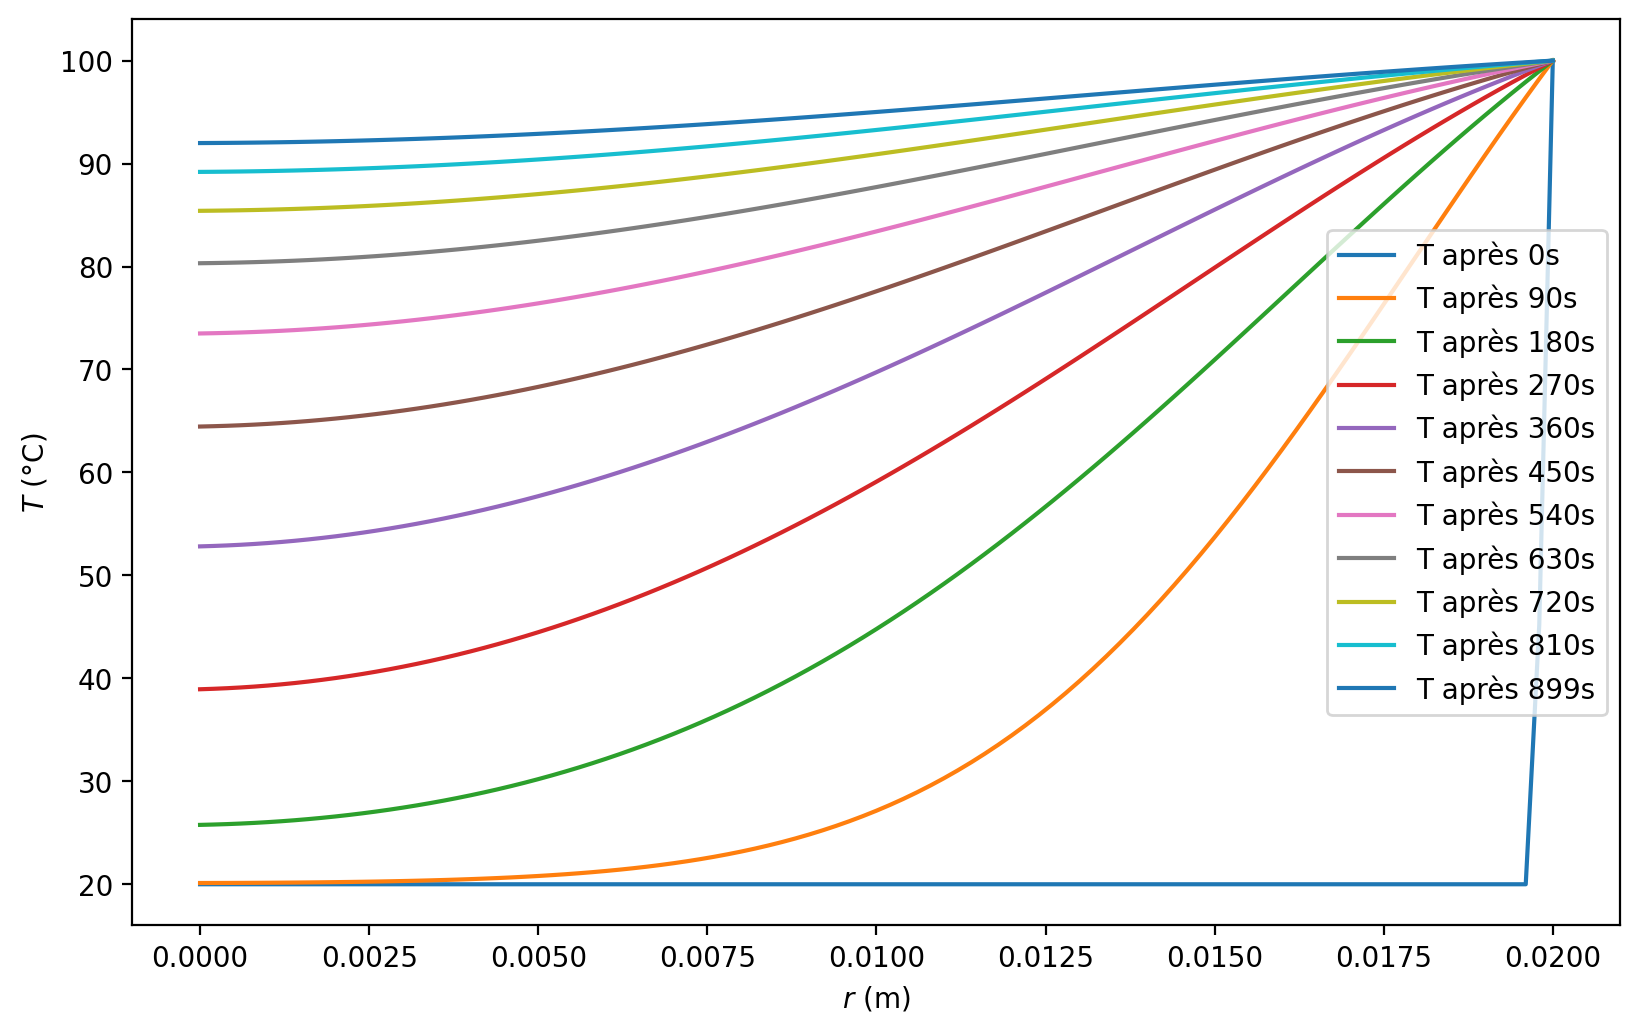

In [13]:
N = 100
R = 2e-2
r = np.linspace(0,R,N+1)
le = R/N
Temp = N*[293] + [373]
D = 1.4e-7
n = 10000
T = 15 * 60
taue = T / n

ratio = 1.2 # ratio de taille entre fig et texte (légende et axes), par défaut 1
plt.figure(figsize=(8*ratio,5*ratio),dpi = 200)
for i in range(n): # on calcul pour chaque pas de temps
  
    Theta=[0] # theta au centre

    for k in range(N) : 
        Theta.append((Temp[k+1]-Temp[k])/le) # calcul de theta en k+1 à l'instant i
        Temp[k] += D*taue/((k+1)*le)**2*(((k+1)*le)**2*Theta[k+1]-(k*le)**2*Theta[k])/le # calcul de temp en k à l'instant i+1

    Temp[N] = 373 #la dernière valeur reste inchangée (100°C)
    
    # 9 premiers plot (T en degrés, pour une meilleure lisibilité)
    if i*10%n == 0:
        plt.plot(r,[Temp[p]-273 for p in range(N+1)],label = "T après "+str(int(i*taue))+"s")

# Dernier graphe
plt.plot(r,[Temp[p]-273 for p in range(N+1)],label = "T après "+str(int(i*taue))+"s")

plt.xlabel('$r \ \mathrm{(m)}$')
plt.ylabel('$T \ \mathrm{(°C)}$')
plt.legend()
plt.show()

On donne quelques informations sur la cuisson d'un oeuf :

- Debut de coagulation de l'ovalbumine (protéines des blancs) à 62°C, et formation d'un gel très ferme à 70°C.

- Début de l'épaississement à 65°C par coagulation des protéines du jaune (ovovitelline), perte de fluidité à 70°C, coagulation totale à 85°C.

**Question 10 :** Estimer le temps pour obtenir un oeuf dur.

**Correction 10 :** D'après le graphique précédent, la température semble atteindre les 85°C à coeur aux alantours des 800s. Vérifions le :

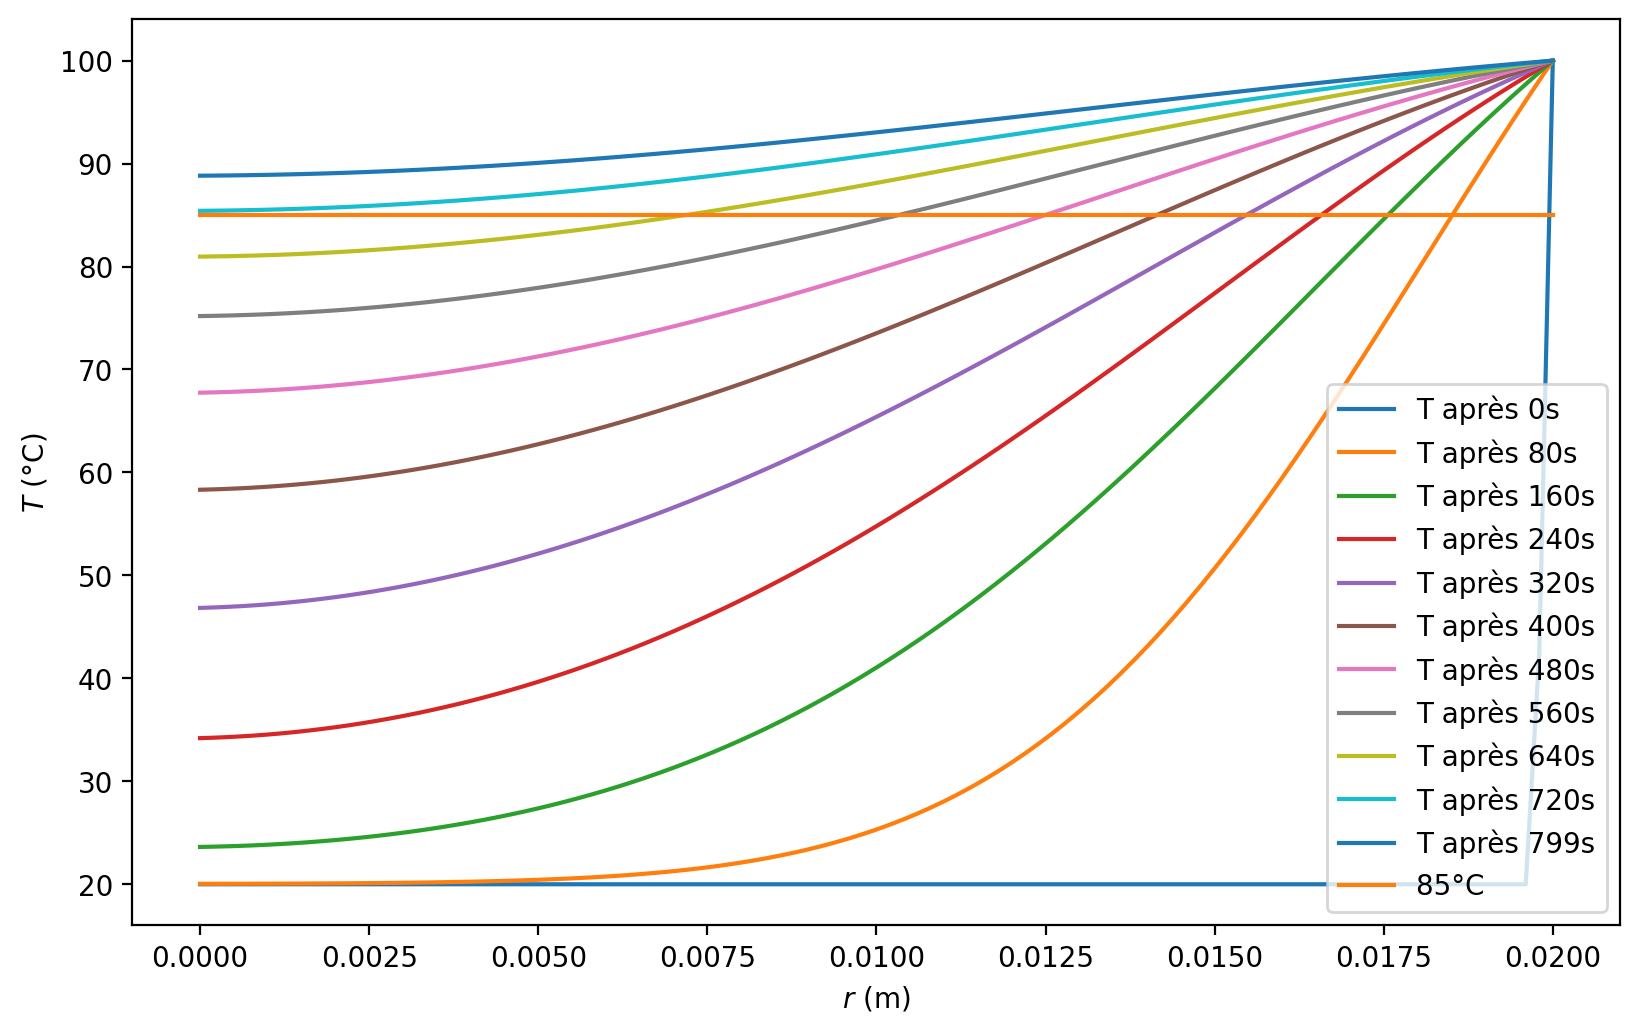

In [12]:
T = 800
taue = T / n
Temp = N*[293] + [373]
  
ratio = 1.2 # ratio de taille entre fig et texte (légende et axes), par défaut 1
plt.figure(figsize=(8*ratio,5*ratio),dpi = 200)
for i in range(n): # on calcul pour chaque pas de temps
  
    Theta=[0] # theta au centre

    for k in range(N) : 
        Theta.append((Temp[k+1]-Temp[k])/le) # calcul de theta en k+1 à l'instant i
        Temp[k] += D*taue/((k+1)*le)**2*(((k+1)*le)**2*Theta[k+1]-(k*le)**2*Theta[k])/le # calcul de temp en k à l'instant i+1

    Temp[N] = 373 #la dernière valeur reste inchangée (100°C)
    
    # 9 premiers plot (T en degrés, pour une meilleure lisibilité)
    if i*10%n == 0:
        plt.plot(r,[Temp[p]-273 for p in range(N+1)],label = "T après "+str(int(i*taue))+"s")

# Dernier graphe
plt.plot(r,[Temp[p]-273 for p in range(N+1)],label = "T après "+str(int(i*taue))+"s")

plt.plot(r,[85 for k in range(N+1)],label = "85°C ")

plt.xlabel('$r \ \mathrm{(m)}$')
plt.ylabel('$T \ \mathrm{(°C)}$')
plt.legend()
plt.show()

De façon plus précise, 720s, soit 12 min semblent suffirent. Usuellement, on parle plutôt de 9 min pour un oeuf dur...

###  <font color='green'> Pour aller plus loin : jaune et blanc <font color='black'>

*On considère que la répartition du jaune dans un oeuf vérifie $\alpha \simeq 0,8$.*

**Question 11 :** Par tatonnement, en modifiant la valeur de `T`, déterminer la durée necessaire pour que l'oeuf soit "à la coque".

**Correction 11 :** Pour un oeuf à la coque, il faut que la majeure partie du jaune se trouve en dessous des 65°C, et la majeure partie du blanc au dessus de 70°C (sachant que le jaune se trouve jusqu'à 1,6 cm du centre). Sur le graphe précédent, on remarque que pour T = 160s, l'oeuf est déjà trop cuit. Regardons avec plus de précision :

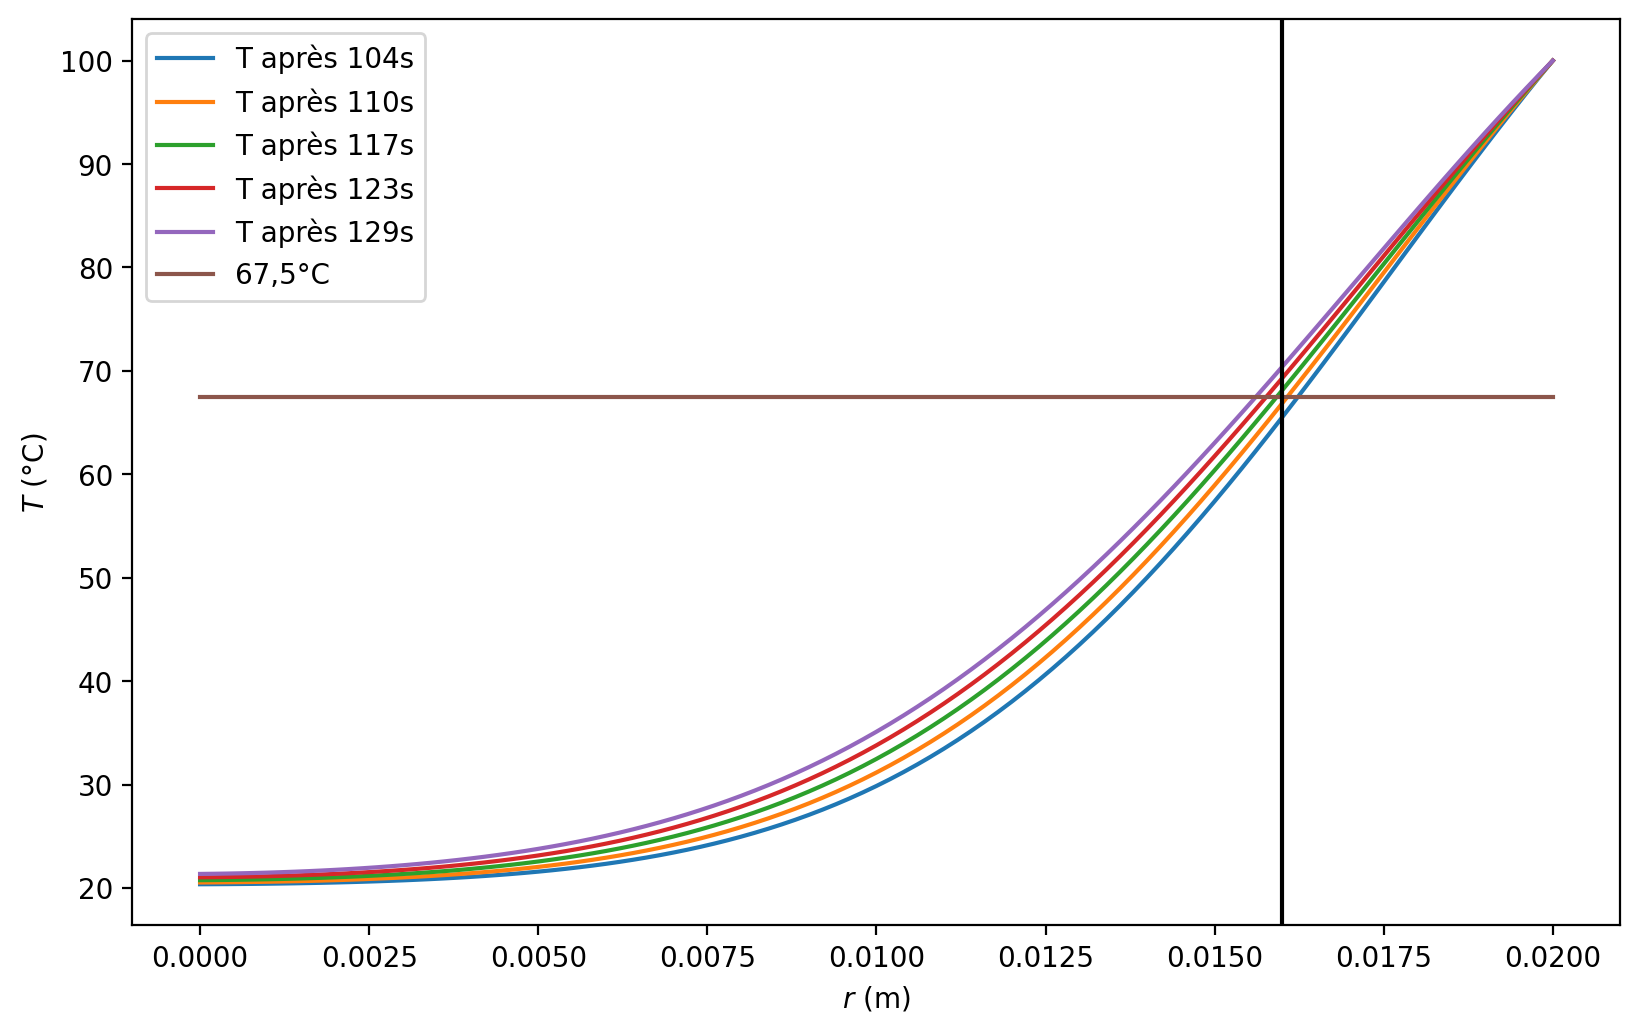

In [14]:
T = 130
taue = T / n
Temp = N*[293] + [373]

ratio = 1.2 # ratio de taille entre fig et texte (légende et axes), par défaut 1
plt.figure(figsize=(8*ratio,5*ratio),dpi = 200)
for i in range(n): # on calcul pour chaque pas de temps
  
    Theta=[0] # theta au centre

    for k in range(N) : 
        Theta.append((Temp[k+1]-Temp[k])/le) # calcul de theta en k+1 à l'instant i
        Temp[k] += D*taue/((k+1)*le)**2*(((k+1)*le)**2*Theta[k+1]-(k*le)**2*Theta[k])/le # calcul de temp en k à l'instant i+1

    Temp[N] = 373 #la dernière valeur reste inchangée (100°C)
    
    if i*20%n == 0 and i*taue > 100:
        plt.plot(r,[Temp[p]-273 for p in range(N+1)],label = "T après "+str(int(i*taue))+"s")

# Dernier graphe
plt.plot(r,[Temp[p]-273 for p in range(N+1)],label = "T après "+str(int(i*taue))+"s")
    
# Ligne horizontale  "à la bonne température"
plt.plot(r,[67.5 for k in range(N+1)],label = "67,5°C ")

# Ligne verticale de séparation blanc/jaune
plt.axvline(x=1.6e-2,color='black')


plt.xlabel('$r \ \mathrm{(m)}$')
plt.ylabel('$T \ \mathrm{(°C)}$')
plt.legend()
plt.show()

Le temps nécessaire est donc compris entre 110 et 117s (alors qu'on parle plutôt de 3 min...).


*L'oeuf dit "parfait", servi dans certains restaurants, s'obtient à l'aide d'une cuisson à 64,5 °C.*

**Question 12 :** Déterminer l'ordre de grandeur de la durée nécessaire pour que l'oeuf soit "parfait".

**Correction 12 :** On impose ici une température extérieur de cuisson de 64,5 °C, et on estime le temps nécessaire pour qu'elle soit atteinte partout, même au centre de l'oeuf :

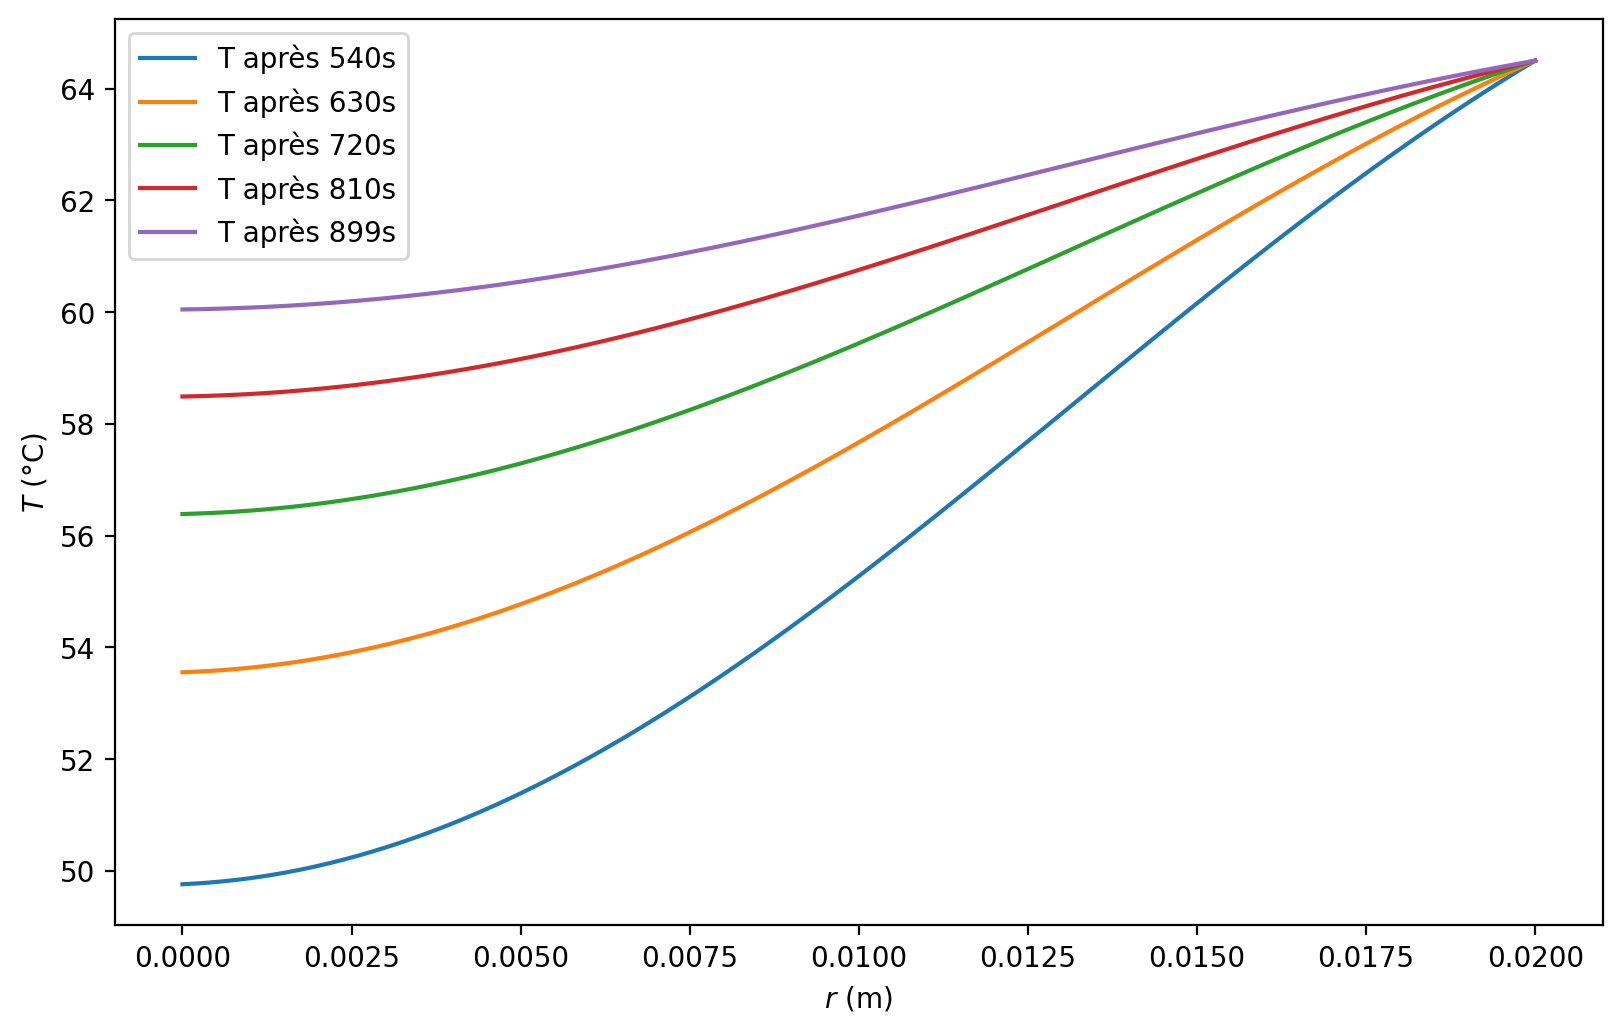

In [15]:
T = 15 * 60
taue = T / n
Temp = N*[293] + [273+64.5]

ratio = 1.2 # ratio de taille entre fig et texte (légende et axes), par défaut 1
plt.figure(figsize=(8*ratio,5*ratio),dpi = 200)
for i in range(n): # on calcul pour chaque pas de temps
  
    Theta=[0] # theta au centre

    for k in range(N) : 
        Theta.append((Temp[k+1]-Temp[k])/le) # calcul de theta en k+1 à l'instant i
        Temp[k] += D*taue/((k+1)*le)**2*(((k+1)*le)**2*Theta[k+1]-(k*le)**2*Theta[k])/le # calcul de temp en k à l'instant i+1

    Temp[N] = 273+64.5 #la dernière valeur reste inchangée (100°C)
    
    # 9 premiers plot (T en degrés, pour une meilleure lisibilité)
    if i*10%n == 0 and i*taue > 500:
        plt.plot(r,[Temp[p]-273 for p in range(N+1)],label = "T après "+str(int(i*taue))+"s")

# Dernier graphe
plt.plot(r,[Temp[p]-273 for p in range(N+1)],label = "T après "+str(int(i*taue))+"s")

plt.xlabel('$r \ \mathrm{(m)}$')
plt.ylabel('$T \ \mathrm{(°C)}$')
plt.legend()
plt.show()

Bien evidemment, cela n'est pas possible avant un temps infini. Estimons le temps necessaire pour qua la température au centre soit d'au moins 95% de celle à atteindre, soit 61,3°C :

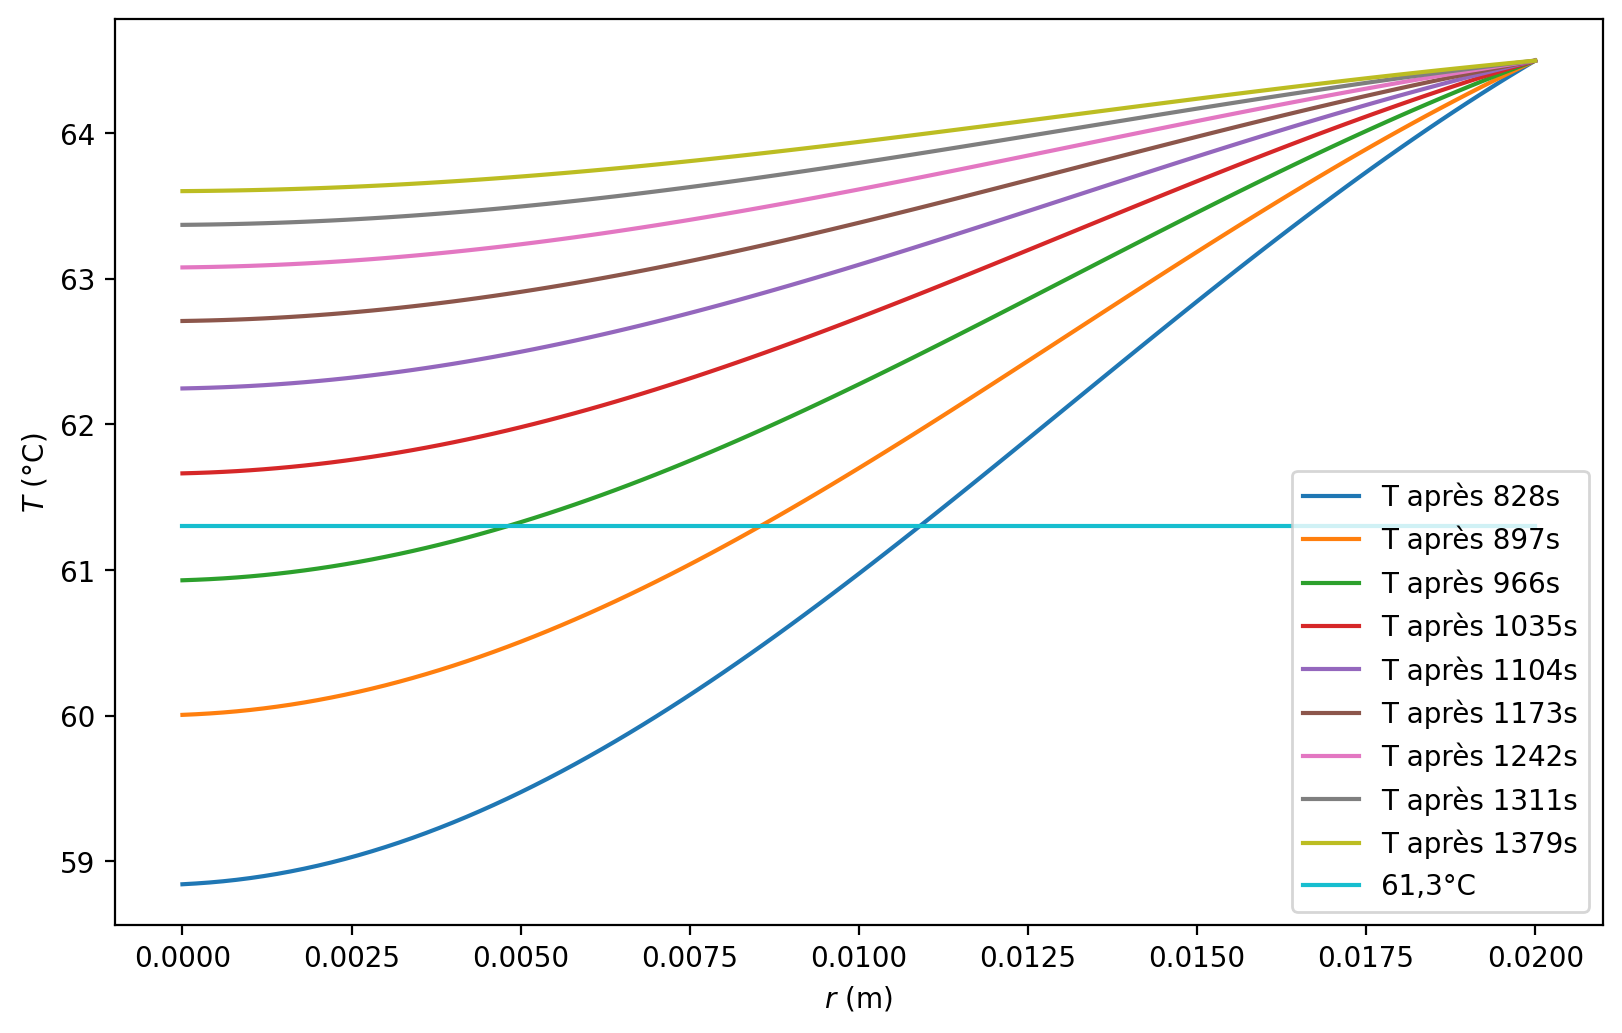

In [16]:
T = 23 * 60
taue = T / n
Temp = N*[293] + [273+64.5]

ratio = 1.2 # ratio de taille entre fig et texte (légende et axes), par défaut 1
plt.figure(figsize=(8*ratio,5*ratio),dpi = 200)
for i in range(n): # on calcul pour chaque pas de temps
  
    Theta=[0] # theta au centre

    for k in range(N) : 
        Theta.append((Temp[k+1]-Temp[k])/le) # calcul de theta en k+1 à l'instant i
        Temp[k] += D*taue/((k+1)*le)**2*(((k+1)*le)**2*Theta[k+1]-(k*le)**2*Theta[k])/le # calcul de temp en k à l'instant i+1

    Temp[N] = 273+64.5 #la dernière valeur reste inchangée (100°C)
    
    # 9 premiers plot (T en degrés, pour une meilleure lisibilité)
    if i*20%n == 0 and i*taue > 800:
        plt.plot(r,[Temp[p]-273 for p in range(N+1)],label = "T après "+str(int(i*taue))+"s")

# Dernier graphe
plt.plot(r,[Temp[p]-273 for p in range(N+1)],label = "T après "+str(int(i*taue))+"s")

# Ligne horizontale  "à 95% de la bonne température"
plt.plot(r,[61.3 for k in range(N+1)],label = "61,3°C ")

plt.xlabel('$r \ \mathrm{(m)}$')
plt.ylabel('$T \ \mathrm{(°C)}$')
plt.legend()
plt.show()

17min semblent donc être suffisantes !

*En réalité le blanc et le jaune n’ont pas tout à fait la même conductivité thermique, elle est même dans un rapport
double. On peut trouver que pour le blanc $D_b = 1,7 × 10^{-7} m^2.s^{-1}$ et que pour le jaune $D_j = 1,0 × 10^{-7}m^2.s^{-1}$.*

**Question 13 :** Modifier le programme pour tenir compte de cette différence, et estimer à nouveau le temps de cuisson d'un oeuf.

##  <font color='red'> Troisième partie : Diffusion de particules
    
###  <font color='green'> Modèle de la marche aléatoire<font color='black'>
    
Pour modéliser la diffusion de particules, on utilise un modèle discret : une molécule se trouve à l'instant $t$ dans une cellule, et peut, à l'instant $t+\tau$, se trouver dans une cellule voisine.

Dans un premier temps, on se place dans le cas unidimensionnel : la particule se déplace sur selon l'axe $x$, et ne peut se trouver, par discrétisation, qu'aux positionx $x_i, i ∈ \mathbb{Z}$. On repère chacune de ces positions par l'entier relatif $i$. On choisit comme origine O, la position initiale de la particule.

<img src="im/al.png"> 

Une particule située en $i$ à l'instant $t$, a une chance sur deux (probabilité $0,5$) de se retrouver en $i-1$ à l'instant $t+\tau$, et l'autre chance sur deux (probabilité $0,5$) de se retrouver en $i+1$ à l'instant $t+\tau$ : c'est ce qu'on nomme une marche aléatoire, c'est-à-dire qu'on effectue des pas dans une direction aléatoire !

**Question 1 :** Ecrire une fonction `ma1d(tf,n)` qui retourne la liste des positions $L$ d'une particule et celle $T$ des temps à chaque pas, jusqu'à l'instant $t_f$. La particule est initialement (à $t_i = 0$) en O, et a effectué une marche aléatoire de $n+1$ pas. On utilisera la fonction `randint(a,b)`, générant un entier aléatoirement compris entre a et b (compris).

In [17]:
def ma1d(tf,n):
    tau = tf / n
    ti = 0 # temps initial
    i = 0 # position initiale
    L, T = [i], [ti]
    for k in range(n):
        r = randint(0,1) # tirage aléatoire
        d = 2*(r-0.5) #  déplacement (soit -1, soit 1)
        i += d # nouvelle position
        ti += tau
        L.append(i)
        T.append(ti)
    return T, L   

Traçons alors différentes trajectoires :

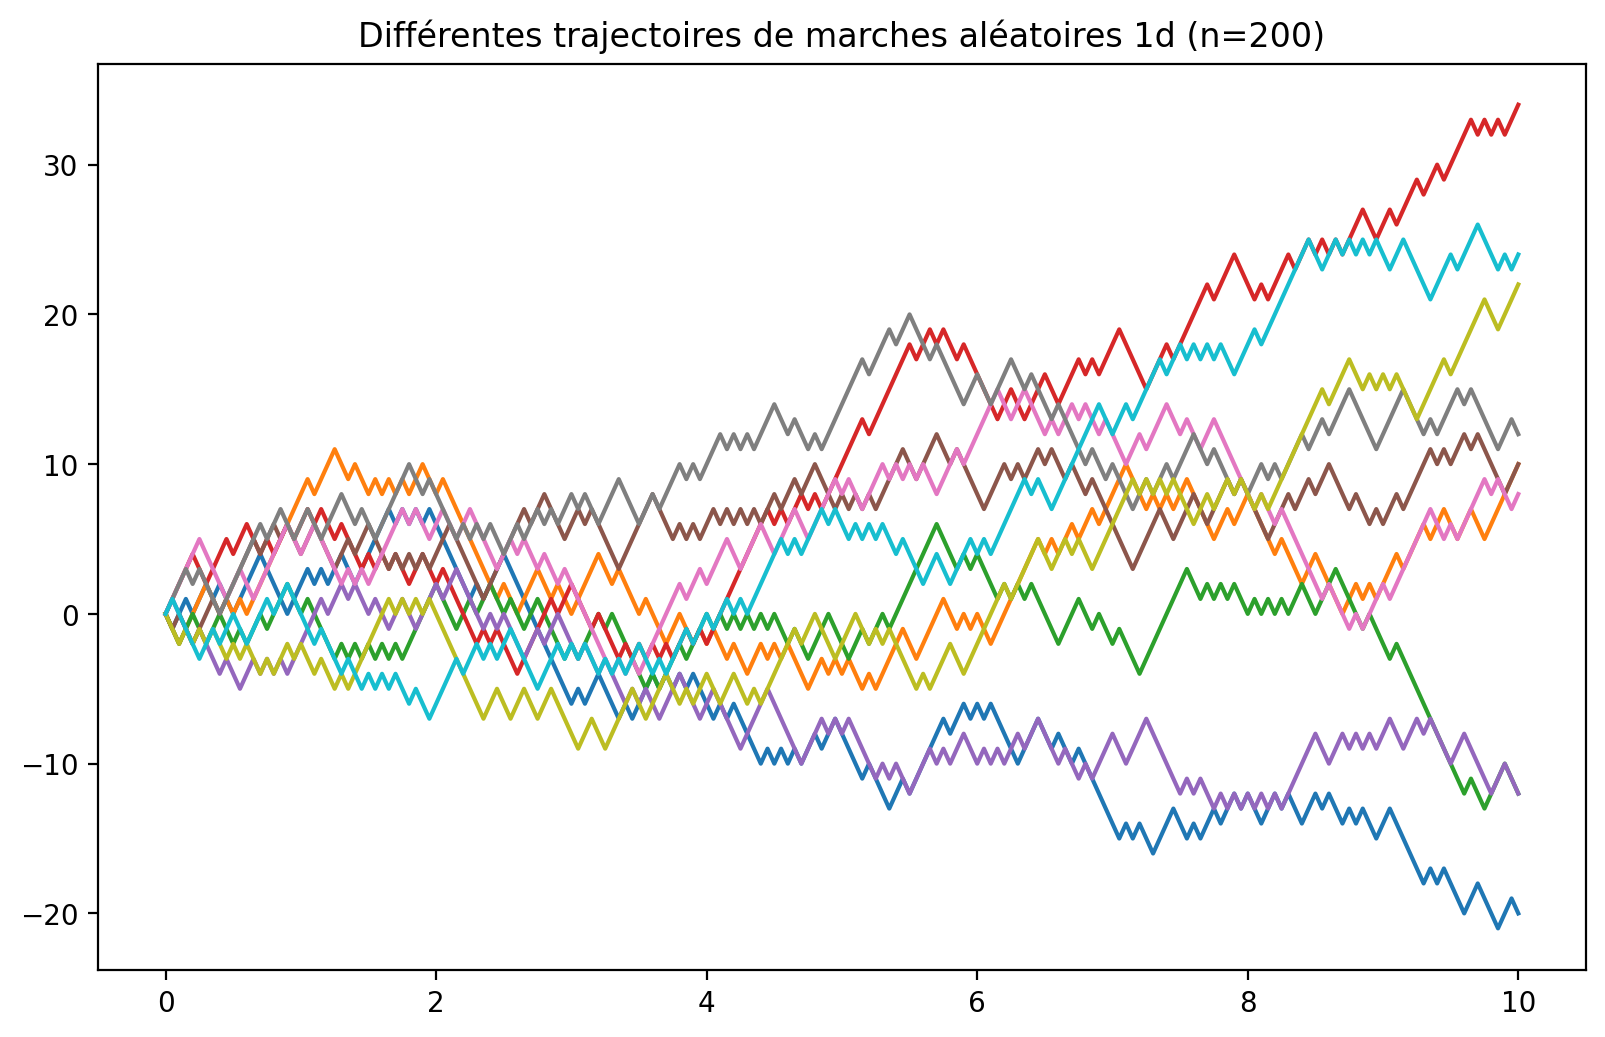

In [18]:
n =200
tf = 10

ratio = 1.2 # ratio de taille entre fig et texte (légende et axes), par défaut 1
plt.figure(figsize=(8*ratio,5*ratio),dpi = 200)
plt.title("Différentes trajectoires de marches aléatoires 1d (n=200)")

for i in range(10):
    T, L = ma1d(tf,n)
    plt.plot(T,L)

plt.show()

Faisons quelques statistiques sur ces marches : nous allons nous interesser à la position moyenne atteinte après un certain temps. Pour cela, nous fera des moyennes sur $N$ marches différentes.

**Question 2 :** Ecrire la fonction `M1dpos(tf,n,N)` qui retourne la liste des $n+1$ temps $T$ et la liste des $n+1$ positions moyennes $M$ à chaque pas, en moyennant sur $N$ marches alétoires.

In [19]:
def M1dpos(tf,n,N):
    M=[0 for i in range(n+1)]
    for j in range(N) :
        T, L = ma1d(tf,n) # on réalise une marche
        for i in range(1,n+1):
            M[i] += L[i]/N # on ajoute la psotion à chaque instant dans la liste M, divisé par N pour faire la moyenne
    return T, M

Traçons ces positions moyennes en fonction du temps :

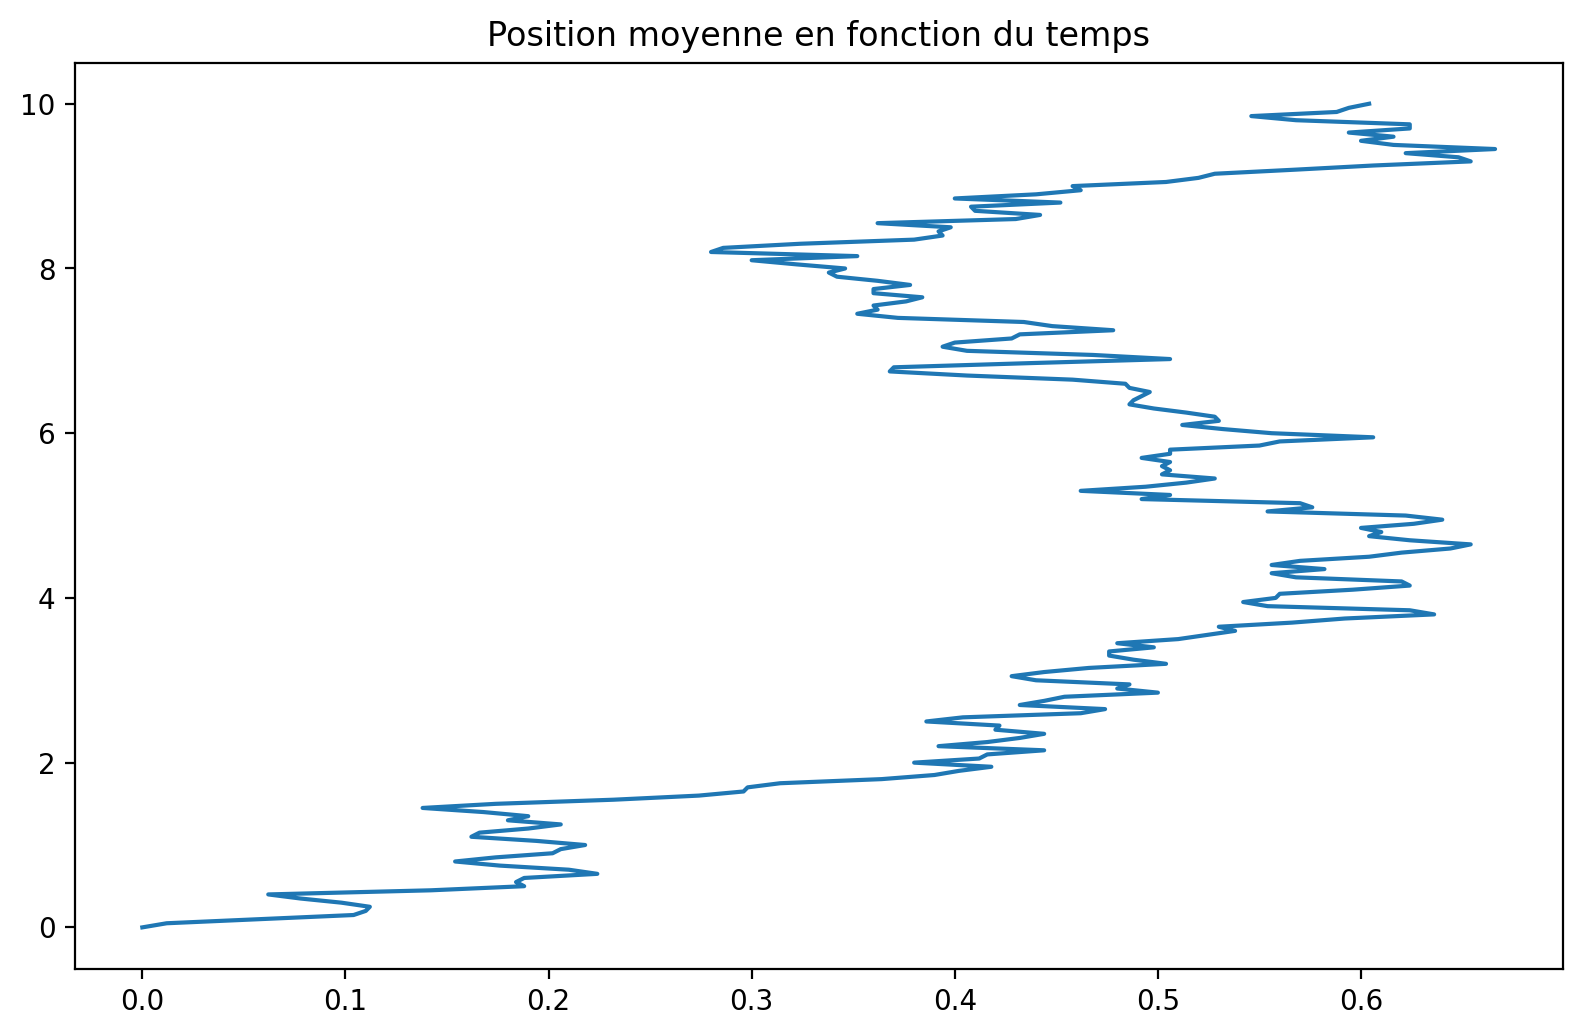

In [20]:
N = 100000
T, M = M1dpos(tf,n,1000)
ratio = 1.2 # ratio de taille entre fig et texte (légende et axes), par défaut 1
plt.figure(figsize=(8*ratio,5*ratio),dpi = 200)
plt.title("Position moyenne en fonction du temps")
plt.plot(M,T)
plt.show()

Diantre ! La position moyenne est vraiment très proche de l'origine, quelquesoit le temps considéré...alors qu'on observait précédemment des trajectoires qui s'éloignaient de cette même origine !

**Question 3 :** Expliquer ce phénomène !

*Correction :* A chaque pas, on a la même probabilité d'aller à droite ou à gauche, il est donc normal *qu'en moyenne*, on reste au milieu, donc proche de l'origine. Autrement dit, si on observe une marche (soit une succession de pas) qui, au bout d'un temps $T$, se retrouve en $i$, il existe, avec la même probabilité, la marche symétrique qui se retrouve en $-i$ au même instant $T$ : en moyenne, à chaque instant $T$, on se trouve au milieu, à l'origine.

Pour tenir compte de la symétrie de ces marches, nous allons calculer, à la place de la position moyenne, la distance moyenne à l'origine

**Question 4 :** Ecrire une fonction `M1ddist(tf,n,N)` qui retourne la liste des $n+1$ temps $T$ et la liste des $n+1$ distances moyennes à l'origine $D$ à chaque pas, en moyennant sur $N$ marches alétoires.

In [21]:
def M1ddist(tf,n,N):
    D=[0 for i in range(n+1)]
    for j in range(N) :
        T, L = ma1d(tf,n) # on réalise une marche
        for i in range(1,n+1):
            D[i] += abs(L[i])/N # on ajoute la distance à l'origine à chaque instant dans la liste M, divisé par N pour faire la moyenne
    return T, D

Voyons cela :

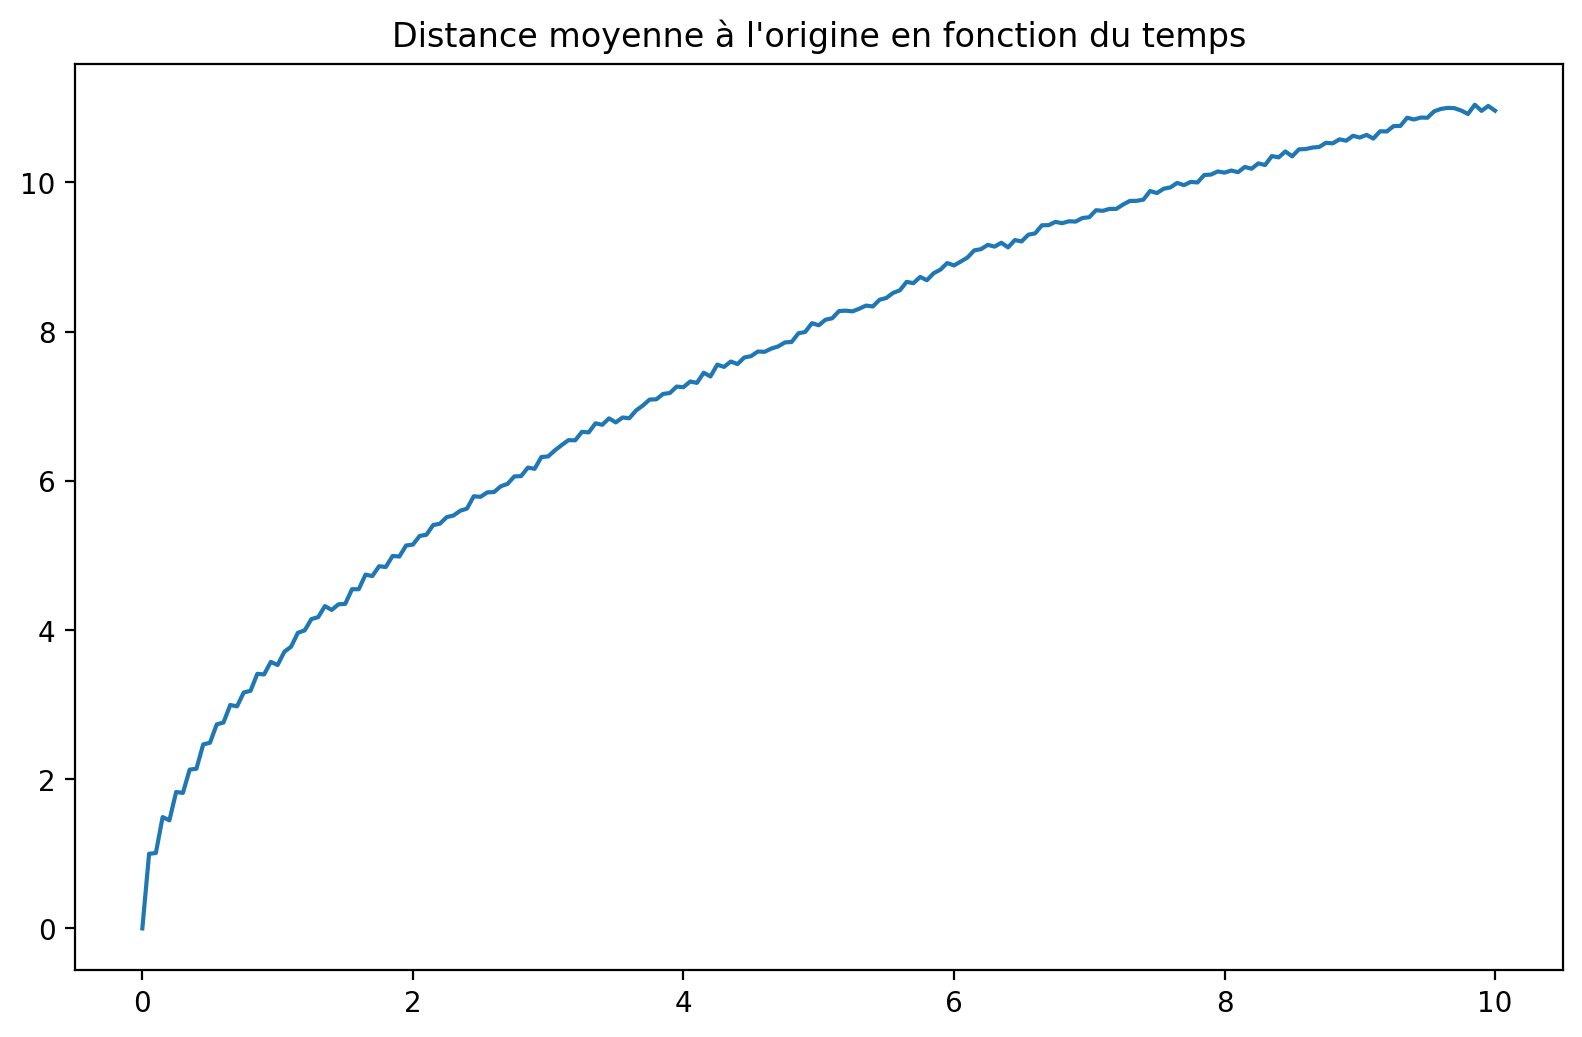

In [22]:
T, D = M1ddist(tf,n,1000)
ratio = 1.2 # ratio de taille entre fig et texte (légende et axes), par défaut 1
plt.figure(figsize=(8*ratio,5*ratio),dpi = 200)
plt.title("Distance moyenne à l'origine en fonction du temps")
plt.plot(T,D)
plt.show()

**Question 5 :** Commenter le graphe précédemment obtenu : mathématiquement, comment semble évoluer la distance moyenne à l'origine en fonction du temps ? A quel phénomène cela fait-il penser ?

*Correction :* On semble avoir $D \propto \sqrt{T}$. Vérifions :

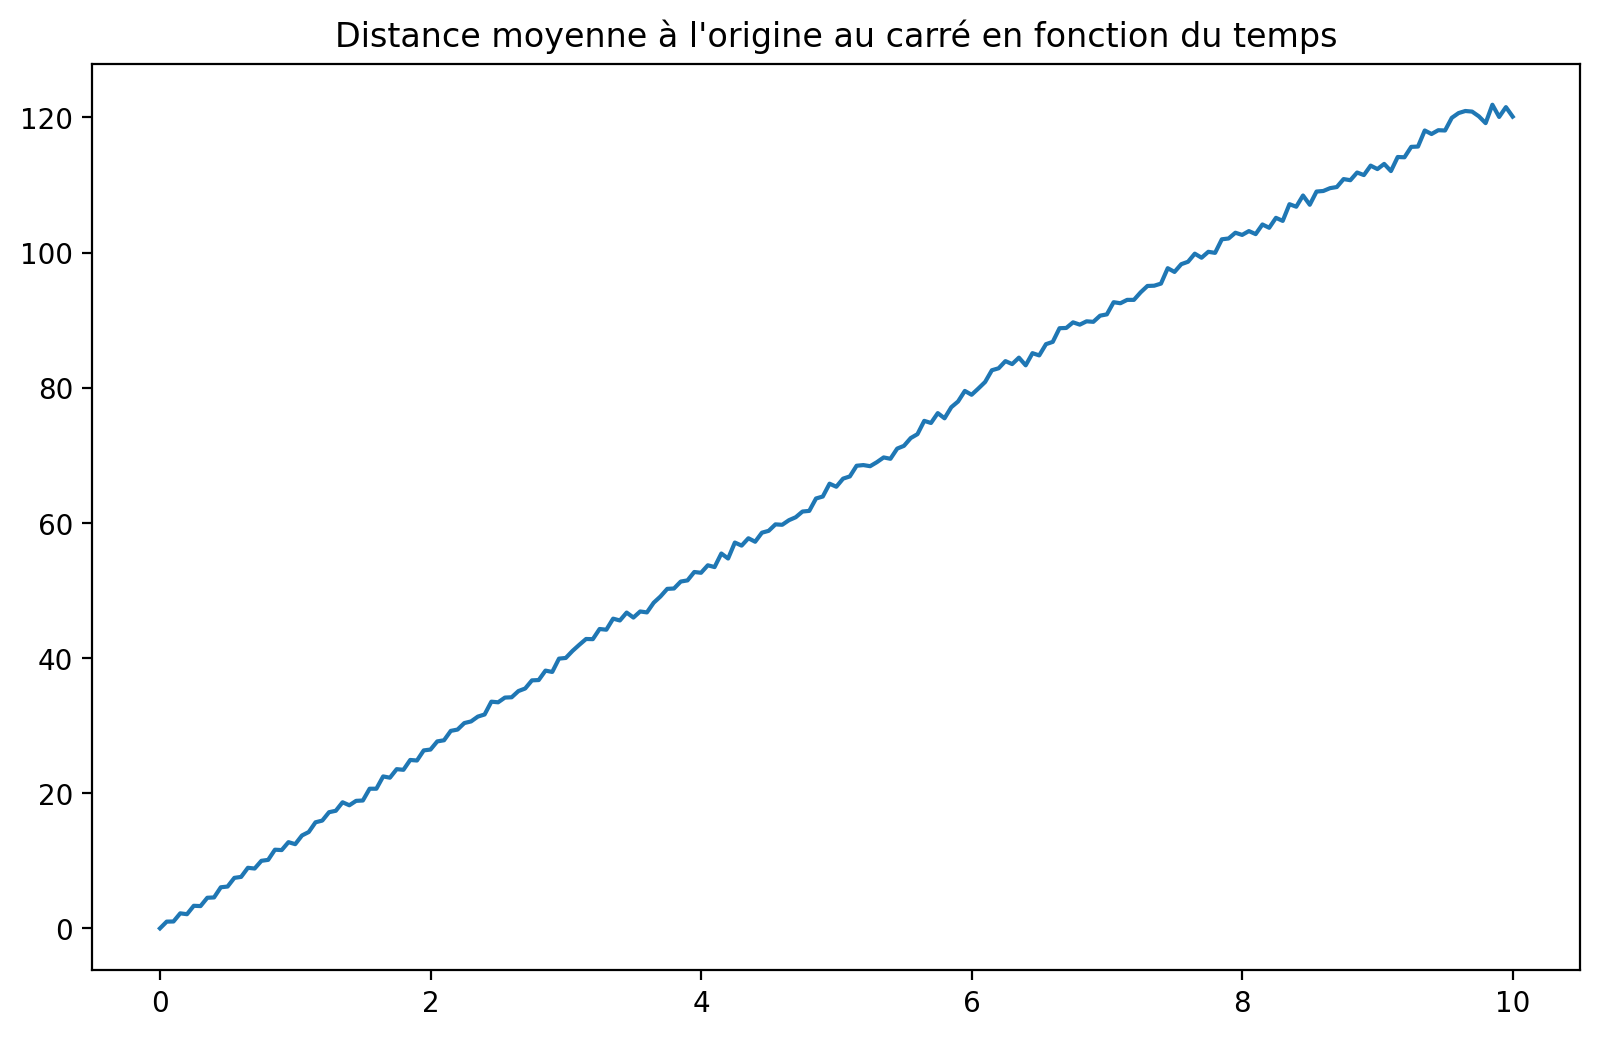

In [23]:
D2 = [elem**2 for elem in D]
ratio = 1.2 # ratio de taille entre fig et texte (légende et axes), par défaut 1
plt.figure(figsize=(8*ratio,5*ratio),dpi = 200)
plt.title("Distance moyenne à l'origine au carré en fonction du temps")
plt.plot(T,D2)
plt.show()

La proportionnalité entre la distance moeynne à l'origine au carré et le temps semble donc être vérifiée. Cette relation est typique des **phénomènes de diffusion**. Vérifions cela théoriquement...

**Question 6 :** On note $p(x_i,t)$ la probabilité de se trouver en $x_i$ à l'instant $t$. Exprimer $p(x_i,t+\tau)$ en fonction de $p(x_{i-1},t)$ et $p(x_{i+1} ,t)$.

Pour se trouver en $x_i$ à l'instant $t$, il fallait soit se trouver en $x_{i-1}$ à l'instant précédent (en $t$), soit en $x_{i+1}$. Cependant, dans chacune de ces positions, il faut faire "le bon pas" pour arriver en $x_i$ : ce "bon pas" a pour probabilité $1/2$. On  a donc :
$$ p(x_{i},t+\tau) = \frac{1}{2}p(x_{i-1},t)+ \frac{1}{2}p(x_{i+1},t)$$

**Question 7 :** On note $\Delta x =x_{i+1}-x_i$ la longueur d'un pas, et $\Delta t =\tau$ la durée d'un pas, et on pose $x = x_i$. Ré-écrire l'équation précédente à l'aide de $x$, $t$, $\Delta t$ et $\Delta x$. Utiliser alors des développerments de Taylor pour montrer que $p(x,t)$ obéit à une équation de diffusion, et donner l'expression du coefficient de diffusion.

On a : $$ p(x,t+\Delta t) = \frac{1}{2}p(x - \Delta x,t)+ \frac{1}{2}p(x + \Delta x,t)$$
On utilise alors des développements de Taylor à l'ordre 2 en spatial :
$$ p(x - \Delta x,t)=p(x,t) - \Delta x \frac{\partial p}{∂ x}(x,t)+ \frac{\Delta x ^2}{2}\frac{\partial^2 p}{∂ x^2}(x,t) + \mathcal{O}(\Delta x ^3)$$
$$ p(x + \Delta x,t)=p(x,t) + \Delta x \frac{\partial p}{∂ x}(x,t)+ \frac{\Delta x ^2}{2}\frac{\partial^2 p}{∂ x^2}(x,t) + \mathcal{O}(\Delta x ^3)$$
Et un développement à l'ordre 1 en temporel :
$$ p(x,t+\Delta)=p(x,t) + \Delta t \frac{\partial p}{∂ t}(x,t)+ \mathcal{O}(\Delta t ^2)$$
Finalement, on obtient l'équation de diffusion suivante :
$$ \frac{\partial p}{∂ t}(x,t) = D_{diff} \frac{\partial^2 p}{∂ x^2}(x,t)\ \mathrm{ avec }\ D_{diff} = \frac{\Delta x ^2}{2 \Delta t^2} $$ 

On a donc vu que pour lorsque la longueur et la durée des pas tendent vers 0, on retourve un espace "continu", et le mouvement de cette marche suit une loi de diffusion. Vérifions d'autres caractéristiques de cette loi de diffusion.

Retournons au cas discret : nous allons déterminer ce qu'on nomme la distribution des positions en fonction du temps : il s'agit de construire un histogramme représenter le nombre de marches qui, après un temps $t$, arrive à la position $i$.

**Question 8 :**  Ecrire une fonction `Dist1d(tf,n,N)` qui retourne la liste T des temps, et un tableau $Tab$ (utiliser `np.array`) dans lequel chaque colonne représente les différentes positions en fonction du temps pour une marche (jusqu'au temps $t_f$). Chaque nouvelle colonne correspond à une nouvelle marche. Il s'agit donc d'un tableau de $N$ colonnes et $n+1$ lignes.

In [24]:
def Dist1d(tf,n,N):
    Tab = np.zeros((n+1,N))
    
    for j in range(N):
        T, L = ma1d(tf,n) # une marche, qu'on va stocker dans ja jième colonne du tableau
        Tab[:,j] = L
        
    return T, Tab

Traçons alors l'histogramme :

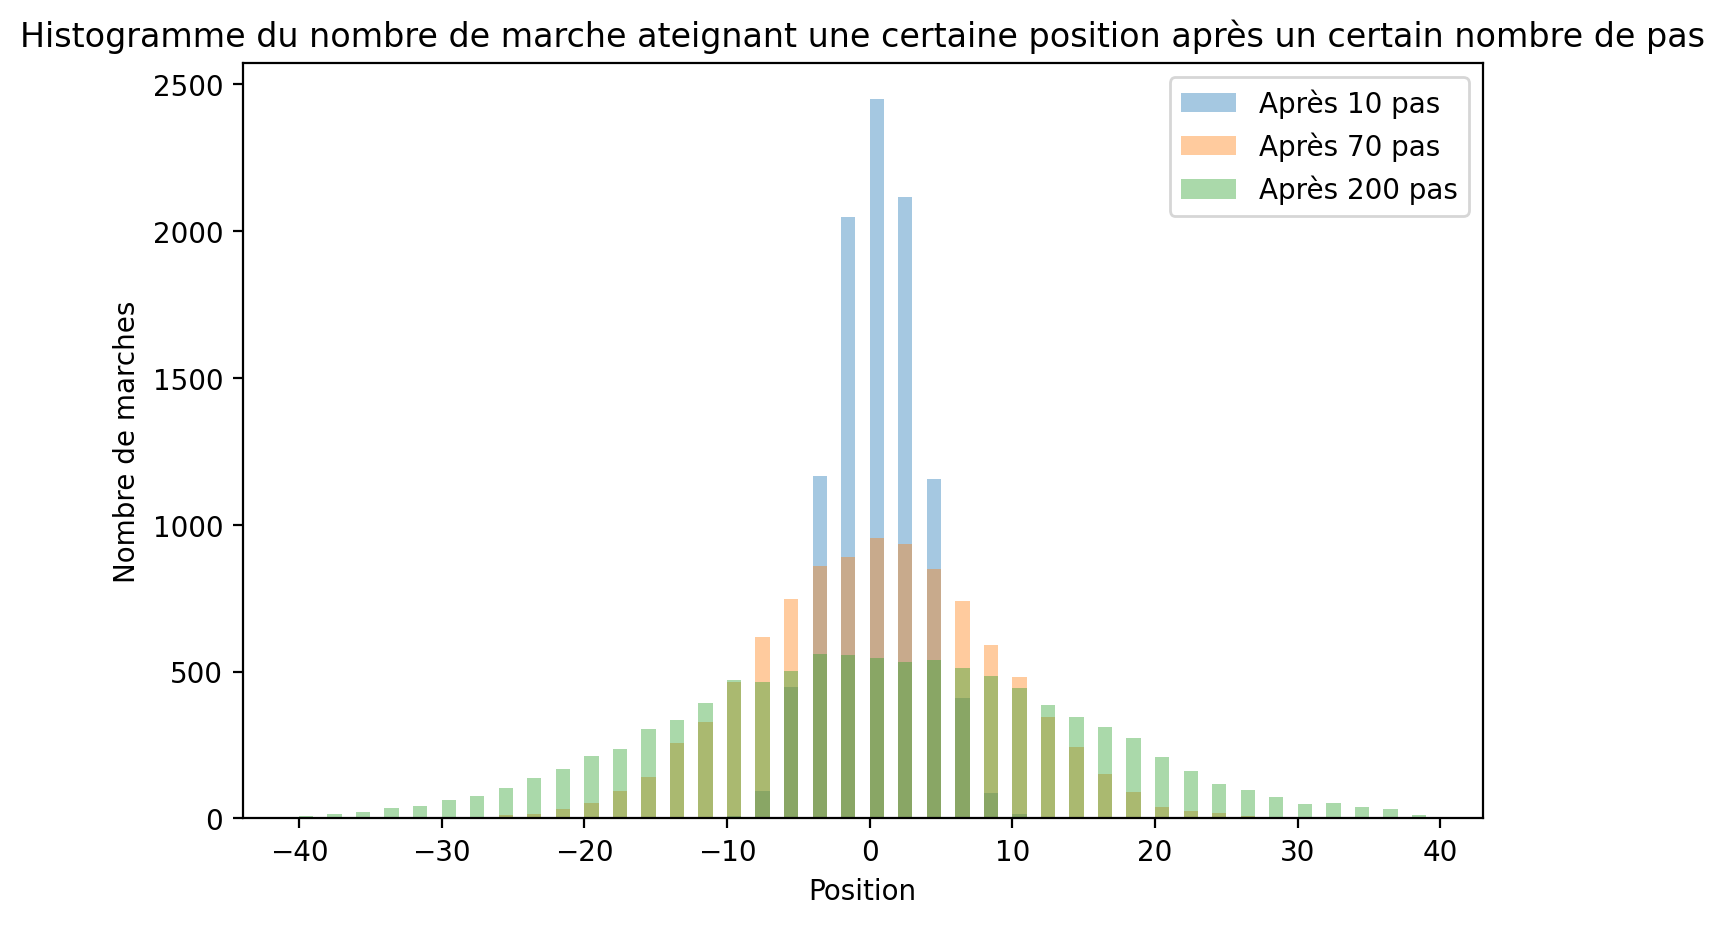

In [26]:
n, tf, N = 200, 10, 10000
T, Tab = Dist1d(tf,n,N)

ratio = 1 # ratio de taille entre fig et texte (légende et axes), par défaut 1
plt.figure(figsize=(8*ratio,5*ratio),dpi = 200)
plt.title("Histogramme du nombre de marche ateignant une certaine position après un certain nombre de pas")
plt.hist(Tab[10,:],bins=[i for i in range(-int(n/5),int(n/5),1)],alpha = 0.4, label ="Après 10 pas")
plt.hist(Tab[70,:],bins=[i for i in range(-int(n/5),int(n/5),1)],alpha = 0.4, label ="Après 70 pas")
plt.hist(Tab[200,:],bins=[i for i in range(-int(n/5),int(n/5),1)],alpha = 0.4, label ="Après 200 pas")
plt.xlabel("Position")
plt.ylabel("Nombre de marches")
plt.legend()
plt.show()

On remarque que la distribution des position "s'étale" avec le temps. On pourrait montrer que cet étalement, caracétrisé par la largeur typique, evolue comme la racine carré du temps (encore une signature du processus de diffusion.

Montrons cette propriété... en théorie continue !

**Question 9 :** Vérifier que la loi de propabilité gaussienne suivante : $$p(x,t) = \frac{1}{\sigma (t)\sqrt{2\pi}} e^{-\frac{x^2}{2\sigma (t)^2}}$$
vérifie l'équation de diffusion, avec $σ (t)$ l'écart-type de cette loi de probabilité.
En déduire l'expression de $σ (t)$, et commenter.

A suivre : 

- fit sur graphe précédent pour sigma(t) ?

- en 2d ?

- vérifier loi de la distance au carré en fonction du temps (voir T&D PC)
